# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Dataset


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# !mkdir ~/.kaggle
# !cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle
!cp /content/gdrive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls /

bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr


## Define Data Directory


In [4]:
# DATA_DIR = "Data/home-credit-default-risk"   #same level as course repo in the data directory
DATA_DIR = "/content/gdrive/MyDrive/Colab_Notebooks/Data/home-credit-default-risk"
# DATA_DIR = "/content/gdrive/MyDrive/Data/home-credit-default-risk"
# !mkdir $DATA_DIR

In [3]:
!ls -l $DATA_DIR

total 3383223
-rw------- 1 root root  26616396 Nov 14 05:04 application_test.csv
-rw------- 1 root root 166440882 Nov 14 05:04 application_train.csv
-rw------- 1 root root 402892815 Nov 14 05:04 bureau_balance.csv
-rw------- 1 root root 171733146 Nov 14 05:04 bureau.csv
-rw------- 1 root root 428422918 Nov 14 05:04 credit_card_balance.csv
-rw------- 1 root root     37383 Nov 14 05:04 HomeCredit_columns_description.csv
-rw------- 1 root root 721616255 Nov 15 20:19 home-credit-default-risk.zip
-rw------- 1 root root 736723751 Nov 14 05:04 installments_payments.csv
-rw------- 1 root root 402704517 Nov 14 05:04 POS_CASH_balance.csv
-rw------- 1 root root 406643508 Nov 14 05:04 previous_application.csv
-rw------- 1 root root    584947 Nov 14 05:04 sample_submission.csv


### Imports

In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import ShuffleSplit


ModuleNotFoundError: No module named 'xgboost'

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [6]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(DATA_DIR + '/' + ds_name + '.csv', ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [7]:
ds_name = 'application_test'
datasets[ds_name] = load_data(DATA_DIR + '/' + ds_name + '.csv', ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [8]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(DATA_DIR + '/' + ds_name + '.csv', ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 42.3 s, sys: 6.61 s, total: 48.9 s
Wall time: 1min 10s


# Exploratory Data Analysis

## Summary of Entire dataset

In [ ]:
print('\033[1m' + "Size of each dataset : " + '\033[0m' , end = '\n' * 1)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:25}: [ {datasets[ds_name].shape[0],}, {datasets[ds_name].shape[1]}]')

Size of each dataset : 
dataset application_train        : [ (307511,), 122]
dataset application_test         : [ (48744,), 121]
dataset bureau                   : [ (1716428,), 17]
dataset bureau_balance           : [ (27299925,), 3]
dataset credit_card_balance      : [ (3840312,), 23]
dataset installments_payments    : [ (13605401,), 8]
dataset previous_application     : [ (1670214,), 37]
dataset POS_CASH_balance         : [ (10001358,), 8]


## Summary of Application train

In [ ]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [ ]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,...,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,...,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,...,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,

In [ ]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,Panel,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73830,150503,NaN,66040,159428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,...,0.101954,0.108607,0.008651,0.028236,NaN,NaN,0.

## Missing data for application train

In [ ]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MEDI,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199


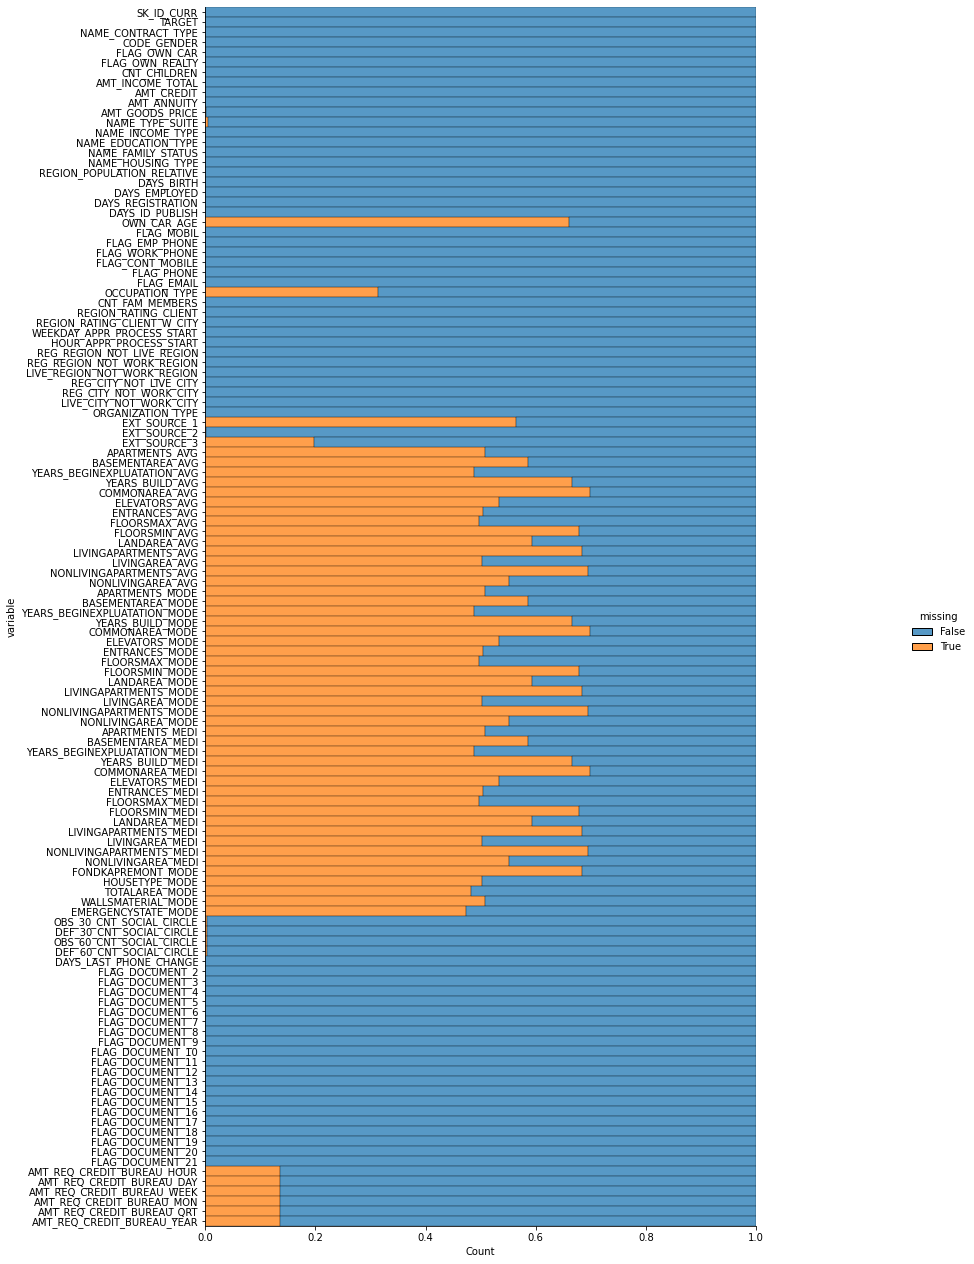

In [ ]:
  def plot_missing_data(df, x, y):
    g = sns.displot(
        data=datasets[df].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    g.fig.set_figwidth(x)
    g.fig.set_figheight(y)
plot_missing_data("application_train",18,20)  

In [ ]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_MEDI,68.72,33495
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
NONLIVINGAPARTMENTS_AVG,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780


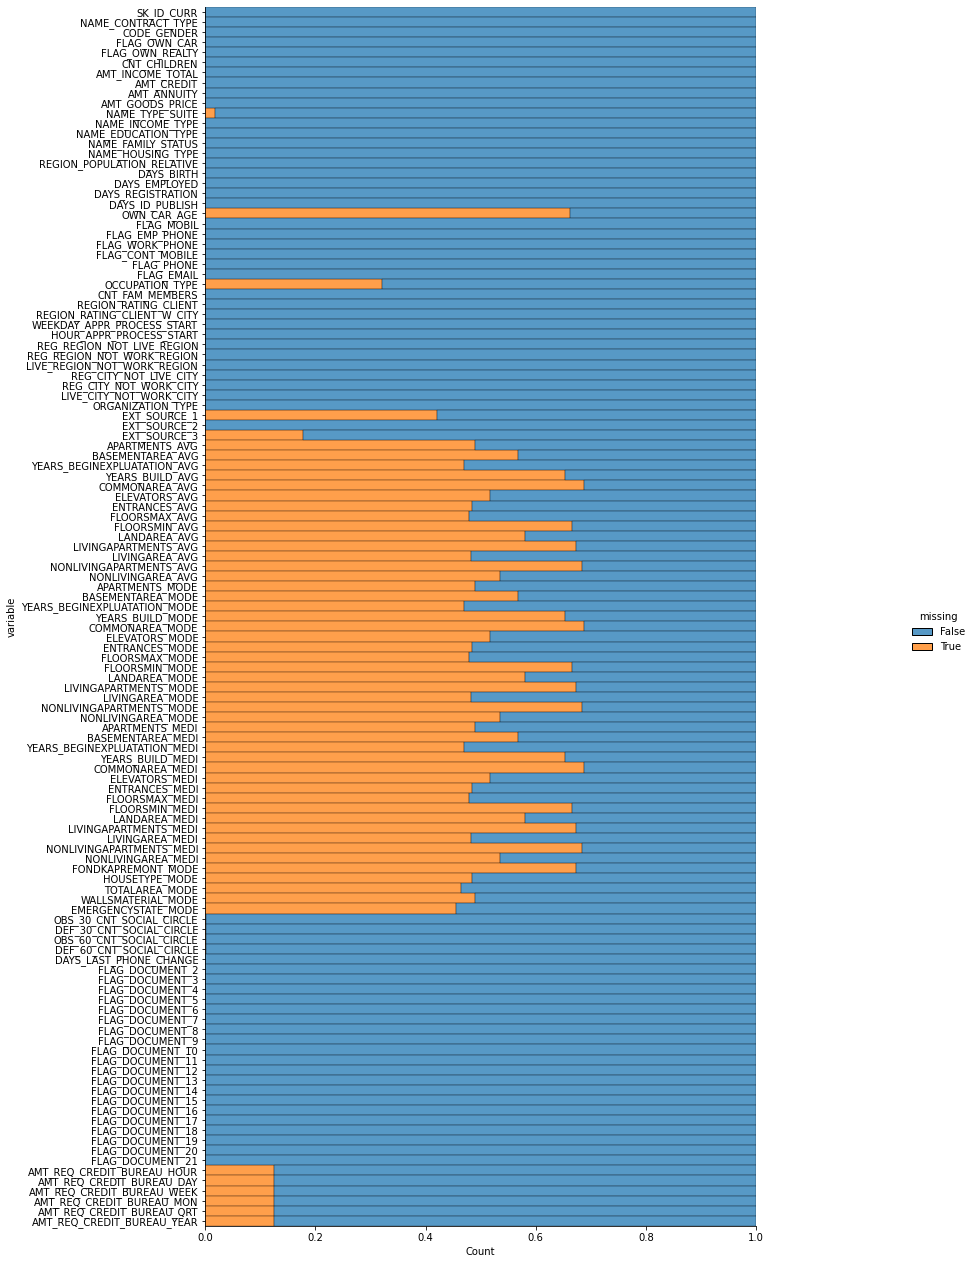

In [ ]:
plot_missing_data("application_test",18,20)    

Observation:
Most of the data from training and test dataset is missing

## Summary of Previous Applications Table

In [ ]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
datasets["previous_application"].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


Observation:          
Most of the Days columns have negative values. This should be an anamoly

## Missing Values of Previous applications table

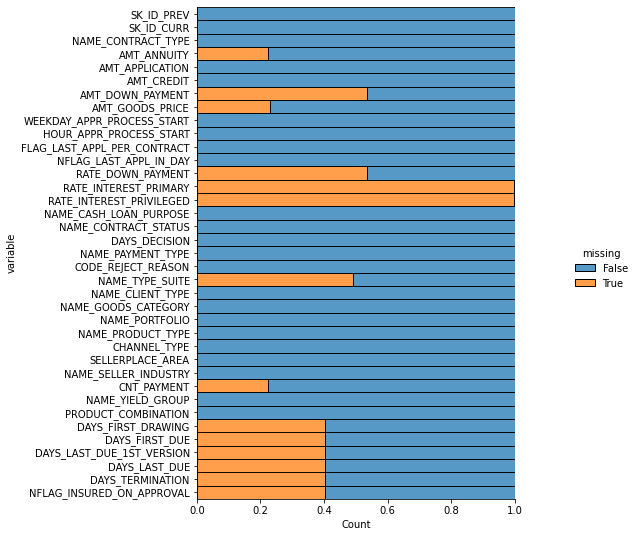

In [ ]:
plot_missing_data("previous_application",10,8)

## Summary of Bureau Table

In [ ]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
datasets["bureau"].describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


## Missing values in Bureau

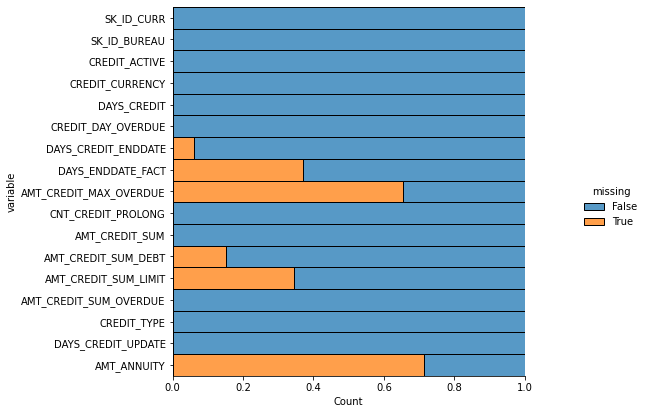

In [ ]:
plot_missing_data("bureau",10,6)

## Summary of Bureau Balance

In [ ]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
datasets["bureau_balance"].describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


## Missing values in Bureau Balance

In [ ]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "bureau_balance Missing Count"])
missing_application_train_data.head(20)

,Percent,bureau_balance Missing Count
STATUS,0.0,0
MONTHS_BALANCE,0.0,0
SK_ID_BUREAU,0.0,0


## Summary of Credit Card Balance

In [ ]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
datasets["credit_card_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


## Missing values in Credit Card Balance

In [ ]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "credit_card_balance Missing Count"])
missing_application_train_data.head(20)

,Percent,credit_card_balance Missing Count
AMT_PAYMENT_CURRENT,20.00,767988
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_ATM_CURRENT,19.52,749816
AMT_DRAWINGS_ATM_CURRENT,19.52,749816
AMT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_INSTALMENT_MATURE_CUM,7.95,305236
AMT_INST_MIN_REGULARITY,7.95,305236
SK_DPD_DEF,0.00,0


## Summary of Installments payments

In [ ]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
datasets["installments_payments"].describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


## Missing values in Installments payments

In [ ]:
# plot_missing_data("installments_payments",10,8)
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Installment payments Missing Count"])
missing_application_train_data.head(20)

,Percent,Installment payments Missing Count
AMT_PAYMENT,0.02,2905
DAYS_ENTRY_PAYMENT,0.02,2905
AMT_INSTALMENT,0.00,0
DAYS_INSTALMENT,0.00,0
NUM_INSTALMENT_NUMBER,0.00,0
NUM_INSTALMENT_VERSION,0.00,0
SK_ID_CURR,0.00,0
SK_ID_PREV,0.00,0


## Summary of POS CASH balance

In [ ]:
datasets["POS_CASH_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
datasets["POS_CASH_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


## Missing values in POS CASH balance

In [ ]:
# plot_missing_data("POS_CASH_balance",5,4)
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "POS_CASH_balance Missing Count"])
missing_application_train_data.head(20)

,Percent,POS_CASH_balance Missing Count
CNT_INSTALMENT_FUTURE,0.26,26087
CNT_INSTALMENT,0.26,26071
SK_DPD_DEF,0.00,0
SK_DPD,0.00,0
NAME_CONTRACT_STATUS,0.00,0
MONTHS_BALANCE,0.00,0
SK_ID_CURR,0.00,0
SK_ID_PREV,0.00,0


## Distribution of Repaid and Unpaid Loan

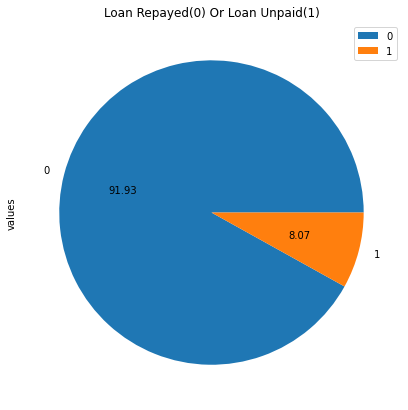

In [ ]:
%matplotlib inline
application_train = datasets["application_train"]
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.plot.pie(y='values',title="Loan Repayed(0) Or Loan Unpaid(1)", figsize=(7,7), autopct='%.2f')

Observation:         
As we can see that the data is imbalanced, the proportion of applicants who have unpaid the loans is very less

## Type of Applicant's Occupation

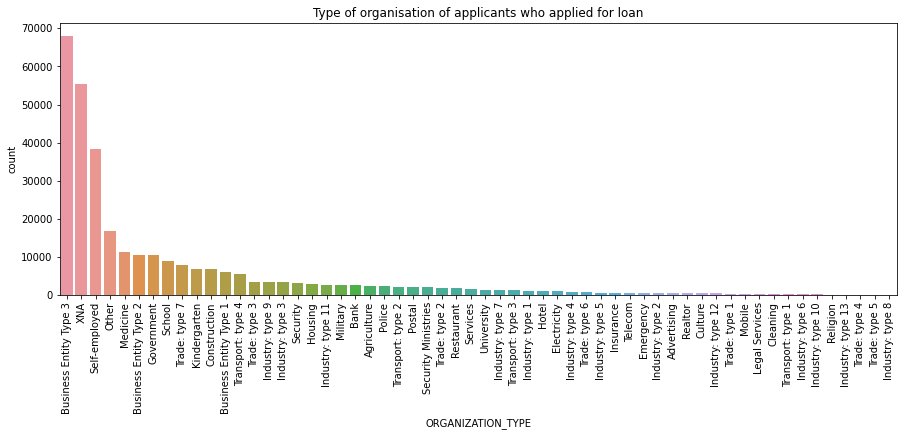

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='ORGANIZATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['ORGANIZATION_TYPE'].value_counts().index);
plt.title('Type of organisation of applicants who applied for loan');
plt.xticks(rotation=90);

 **Types of Organizations who applied for loan :**
  * Business Entity Type 3 - Approx. 68 K
  * XNA - Approx. 55 K
  * Self employed - Approx. 38 K

## Applicants Age 

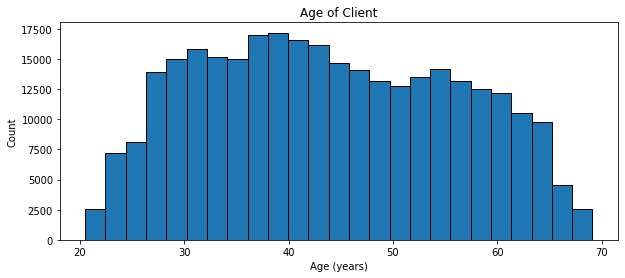

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

### Applicants Age category with respect to Loan Repaid target variable

In [ ]:
datasets["application_train"]['age'] = (np.round(datasets["application_train"]['DAYS_BIRTH']/-365))

datasets["application_train"].loc[(datasets["application_train"]['age'] > 20) & (datasets["application_train"]
                                                                                ['age'] <= 30), 'age_cat'] = '20-30'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 30) & (datasets["application_train"]
                                                                                ['age'] <= 40), 'age_cat'] = '30-40'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 40) & (datasets["application_train"]
                                                                                ['age'] <= 50), 'age_cat'] = '40-50'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 50) & (datasets["application_train"]
                                                                                ['age'] <= 60), 'age_cat'] = '50-60'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 60) & (datasets["application_train"]
                                                                                ['age'] <= 70), 'age_cat'] = '60-70'
datasets["application_train"].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_cat
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,50-60


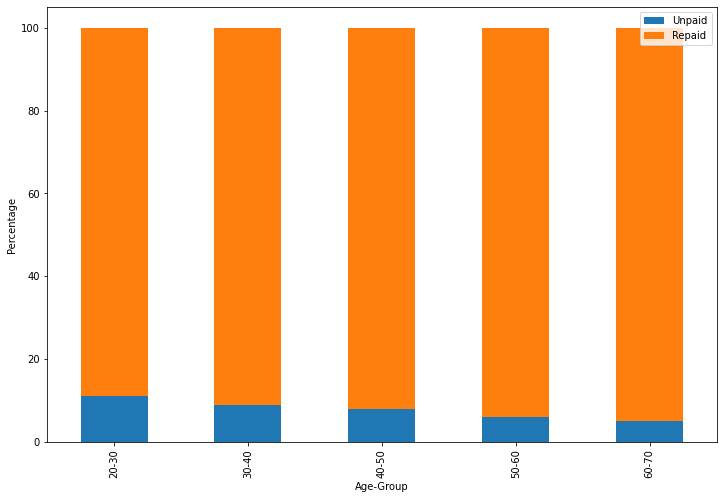

In [ ]:
plotdata = pd.DataFrame({
    "Unpaid":np.round((datasets["application_train"].groupby(['age_cat'])['TARGET'].sum()/datasets["application_train"].groupby(['age_cat'])['TARGET'].count())*100),
    "Repaid":np.round(((datasets["application_train"].groupby(['age_cat'])['TARGET'].count() - datasets["application_train"].groupby(['age_cat'])['TARGET'].sum())/datasets["application_train"].groupby(['age_cat'])['TARGET'].count())*100),
    }, 
    index=['20-30','30-40','40-50','50-60','60-70']
)
ax = plotdata.plot(kind="bar", stacked=True, xlabel="Age-Group", ylabel="Percentage", figsize=(12,8))
for c in ax.containers:

    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # ax.bar_label(c, labels=labels, label_type='center')

Observation:               
People of higher age groups are more likely to repay the loans than people of lower age group.   

In [ ]:
datasets["application_train"].drop(columns=['age','age_cat'], axis=1, inplace=True)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Applicants occupations

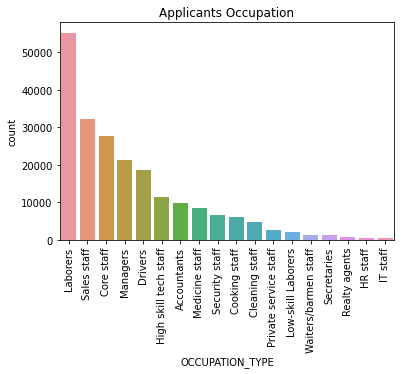

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['OCCUPATION_TYPE'].value_counts().index);

plt.title('Applicants Occupation');
plt.xticks(rotation=90);

Observations:              
Most of the loan applicants are Laborers, Sale's Staff and Core Staff.

## Pair-based Evaluation of Categorical variables of Train dataset with Target variable

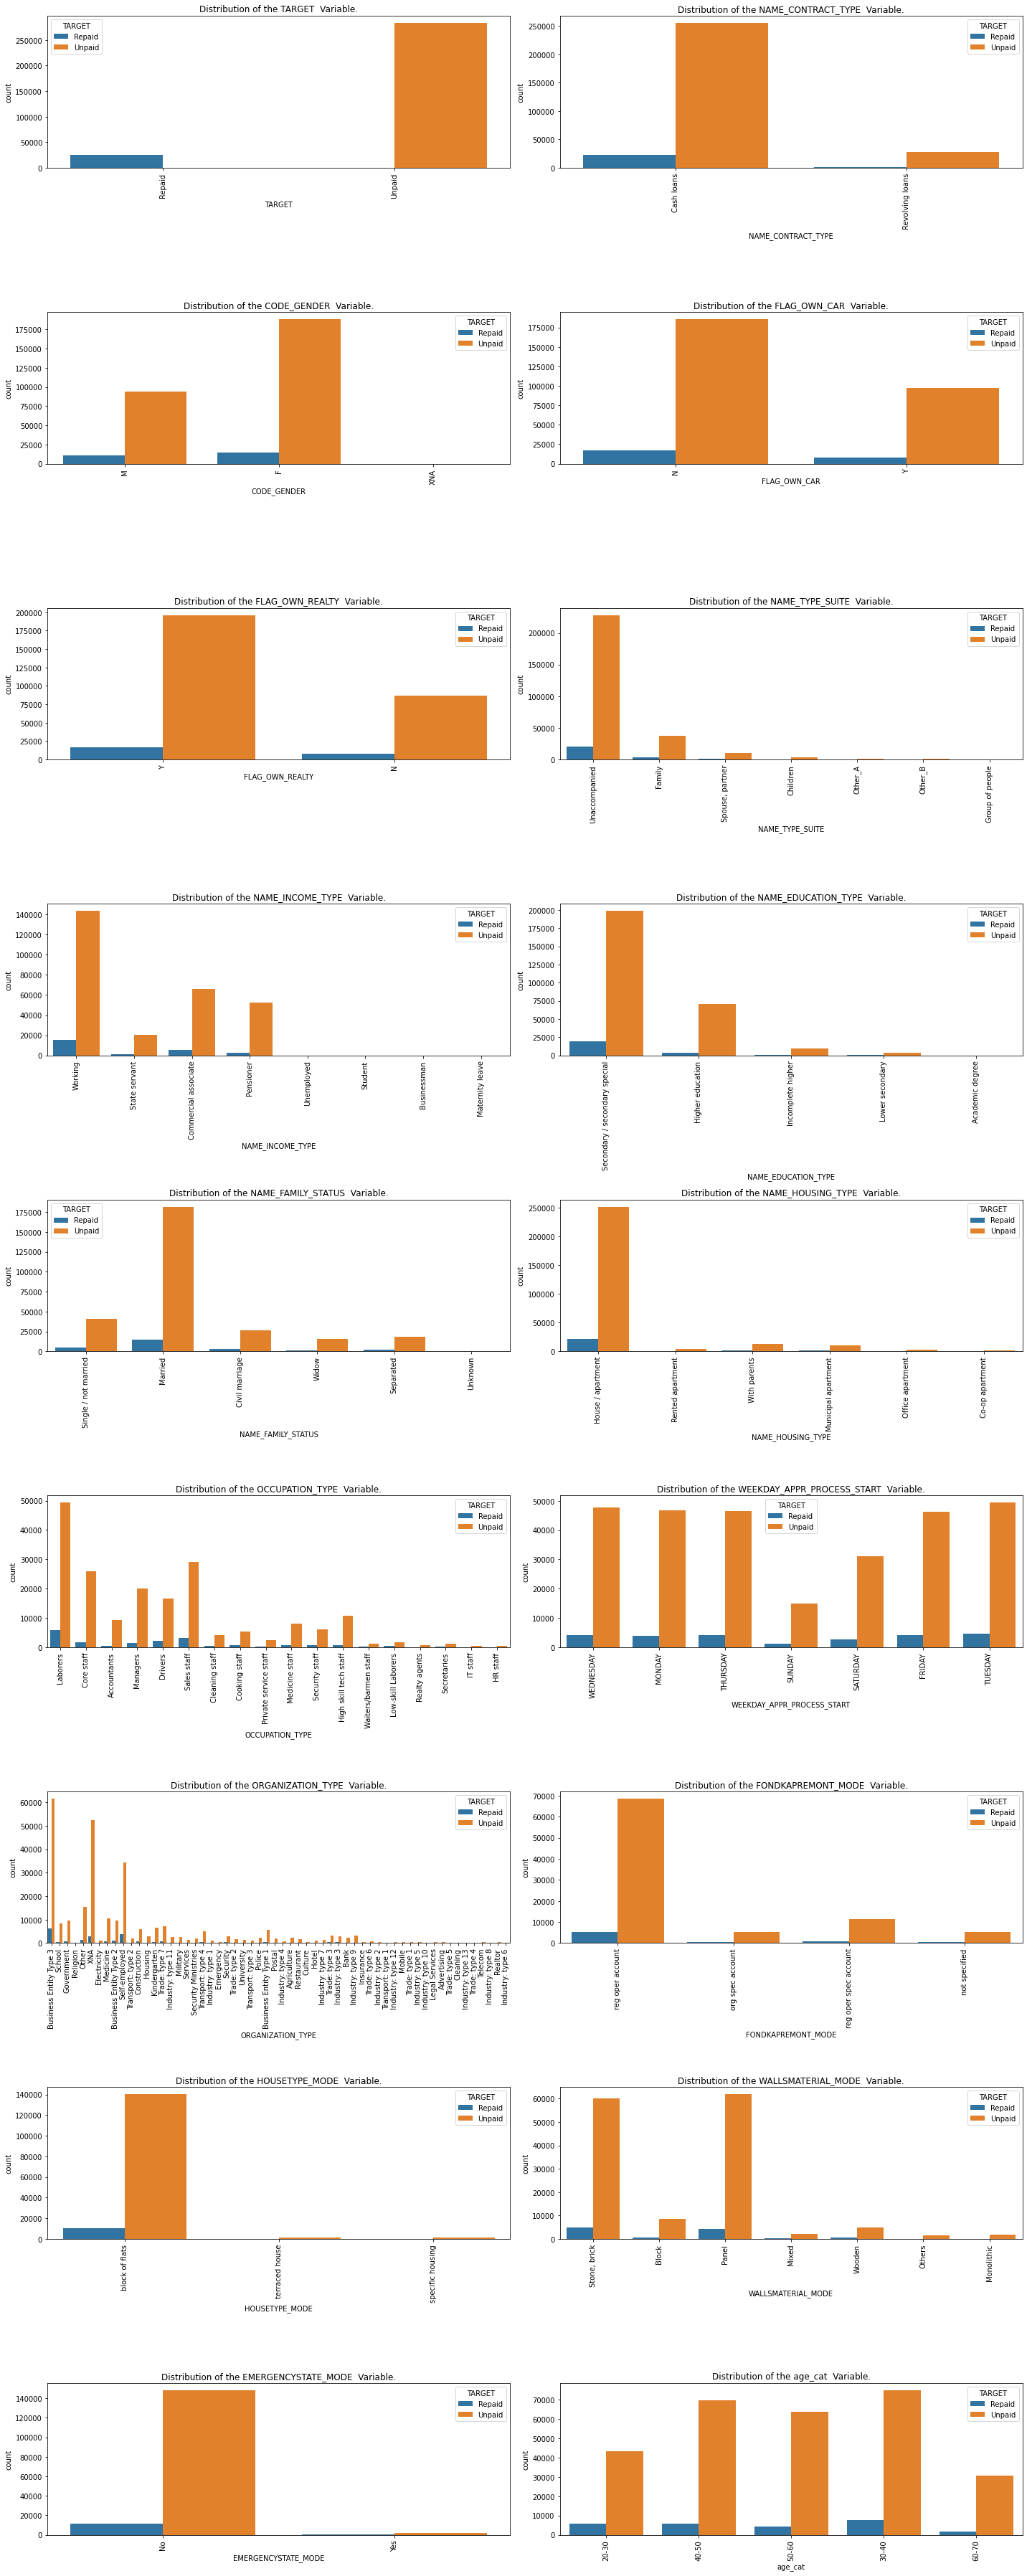

In [ ]:
df = datasets["application_train"].copy()
df['TARGET'].replace(0, "Unpaid", inplace=True)
df['TARGET'].replace(1, "Repaid", inplace=True)

categorical_col = []

for col in df:
    if df[col].dtype == 'object':
        categorical_col.append(col)

plot_x = int(len(categorical_col)/2)
fig, ax = plt.subplots(plot_x, 2, figsize=(20, 50))

num = 0
for i in range(0, 9):
    for j in range(0,2):
        tst = sns.countplot(x=categorical_col[num],
                           data=df, hue='TARGET', ax=ax[i][j])
        tst.set_title(f"Distribution of the {categorical_col[num]}  Variable.")
        tst.set_xticklabels(tst.get_xticklabels(), rotation=90)
        plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=None, hspace=0.45)
        num = num + 1
        plt.tight_layout()

## Correlation of numeric variables with the Target variable

In [ ]:
correlations = np.abs(datasets["application_train"].corr()['TARGET']).sort_values(ascending=False)
print('High value Correlations:\n', correlations.head(11))

High value Correlations:
 TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64


In [ ]:
from pandas.plotting import scatter_matrix
#We can take the top 10 features
top_corr_features = ["TARGET", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY"]
# scatter_matrix(datasets["application_train"][top_corr_features], figsize=(12, 8));
df = datasets["application_train"].copy()
df2 = df[top_corr_features]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,TARGET,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
TARGET,1.00,0.06,0.06,0.06,0.08,-0.16,-0.16,-0.18,0.05,0.05
REGION_RATING_CLIENT,0.06,1.00,0.95,0.03,0.01,-0.12,-0.29,-0.01,-0.01,0.01
REGION_RATING_CLIENT_W_CITY,0.06,0.95,1.00,0.03,0.01,-0.12,-0.29,-0.01,-0.01,0.03
DAYS_LAST_PHONE_CHANGE,0.06,0.03,0.03,1.00,0.08,-0.13,-0.20,-0.08,0.09,0.05
DAYS_BIRTH,0.08,0.01,0.01,0.08,1.00,-0.60,-0.09,-0.21,0.27,0.24
EXT_SOURCE_1,-0.16,-0.12,-0.12,-0.13,-0.60,1.00,0.21,0.19,-0.13,-0.19
EXT_SOURCE_2,-0.16,-0.29,-0.29,-0.20,-0.09,0.21,1.00,0.11,-0.05,-0.08
EXT_SOURCE_3,-0.18,-0.01,-0.01,-0.08,-0.21,0.19,0.11,1.00,-0.13,-0.08
DAYS_ID_PUBLISH,0.05,-0.01,-0.01,0.09,0.27,-0.13,-0.05,-0.13,1.00,0.10
REG_CITY_NOT_WORK_CITY,0.05,0.01,0.03,0.05,0.24,-0.19,-0.08,-0.08,0.10,1.00


* Ext_source_1, Ext_source_2, Ext_source_3 and DAYS_BIRTH (i.e. Age) are the most highly correlated with the Loan Repaid target variable

### Histogram of Number of previous applications for an ID

In [ ]:
appsDF = datasets["previous_application"]

In [ ]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

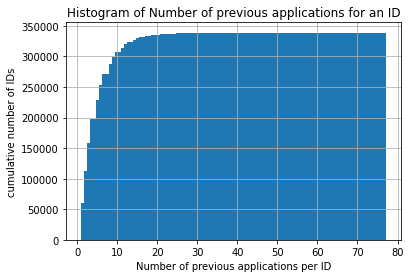

In [ ]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [ ]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Feature Engineering

## One Hot Encoding for Categorical variables

In [9]:
def one_hot_encoder(df):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= False)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


## Feature Aggregator for Numerical variables

In [10]:
# Create aggregate features (via pipeline)
class FeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, dataset_name=None, dataset=None, features=None): # no *args or **kargs
        self.features = features
        self.dataset_name = dataset_name
        self.dataset = dataset
        self.agg_ops = ["min", "max", "mean", "sum"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"], as_index=False).agg({f"{f}":self.agg_ops for f in self.features})
        result.columns = result.columns.map('_'.join)
        return result 

    
class BureauBalanceFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, dataset_name=None, dataset=None,features=None): # no *args or **kargs
        self.features = features
        self.dataset_name = dataset_name
        self.dataset = dataset
        self.agg_ops = ["min", "max", "mean", "sum"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_BUREAU"], as_index=False).agg({f"{f}":self.agg_ops for f in self.features})
        result.columns = result.columns.map('_'.join)
        result.rename(columns={self.dataset_name + '_' +'SK_ID_BUREAU_':'SK_ID_BUREAU'}, inplace=True)
        result.columns = pd.Index(['BUR_BAL_' + e for e in result.columns.tolist()])
        return result
     


## Add Features

In [11]:
 def bureau_add_features():
    bureau['BUREAU_CREDIT_TO_ANNUITY_RATIO'] = bureau['BUREAU_AMT_CREDIT_SUM'] / bureau['BUREAU_AMT_ANNUITY']
    bureau['BUREAU_CREDIT_TO_INCOME_RATIO'] = bureau['BUREAU_AMT_CREDIT_SUM_mean'] / datasets['application_train']['AMT_INCOME_TOTAL']
    bureau['BUREAU_CREDIT_DURATION'] = -bureau['BUREAU_DAYS_CREDIT'] + bureau['BUREAU_DAYS_CREDIT_ENDDATE']
    bureau['BUREAU_ENDDATE_DIF'] = bureau['BUREAU_DAYS_CREDIT_ENDDATE'] - bureau['BUREAU_DAYS_ENDDATE_FACT']
    bureau['BUREAU_DEBT_RATIO'] = bureau['BUREAU_AMT_CREDIT_SUM'] / bureau['BUREAU_AMT_CREDIT_SUM_DEBT']
    # bureau.rename(columns={'AMT_ANNUITY':'BUREAU_AMT_ANNUITY'}, inplace=True)
    return bureau

def prevApps_add_features():
    prevApps['PREVAPP_APPLICATION_CREDIT_DIFF'] = prevApps['PREVAPP_AMT_APPLICATION'] - prevApps['PREVAPP_AMT_CREDIT']
    prevApps['PREVAPP_APPLICATION_CREDIT_RATIO'] = prevApps['PREVAPP_AMT_APPLICATION'] / prevApps['PREVAPP_AMT_CREDIT']
    prevApps['PREVAPP_CREDIT_TO_ANNUITY_RATIO'] = prevApps['PREVAPP_AMT_CREDIT']/prevApps['PREVAPP_AMT_ANNUITY']
    prevApps['PREVAPP_DOWN_PAYMENT_TO_CREDIT'] = prevApps['PREVAPP_AMT_DOWN_PAYMENT'] / prevApps['PREVAPP_AMT_CREDIT']
    return prevApps

def cc_bal_add_features():
    cc_bal['CC_BAL_LIMIT_USE'] = cc_bal['CC_BAL_AMT_BALANCE'] / cc_bal['CC_BAL_AMT_CREDIT_LIMIT_ACTUAL']
    cc_bal['CC_BAL_DRAWING_LIMIT_RATIO'] = cc_bal['CC_BAL_AMT_DRAWINGS_ATM_CURRENT'] / cc_bal['CC_BAL_AMT_CREDIT_LIMIT_ACTUAL']
    return cc_bal

def installments_pmnts_add_features():
    installments_pmnts['INSTLMNT_PAID_OVER_AMOUNT'] = installments_pmnts['INSTLMNT_AMT_PAYMENT'] - installments_pmnts['INSTLMNT_AMT_INSTALMENT']
    return installments_pmnts

def app_train_add_features(df):
    df['CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    # Income ratios
    df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']
    # Time ratios
    df['EMPLOYED_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    df['CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    df['CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH'] 
    return df   

## Applying OHE and Feature Aggregation to Secondary Tables

In [12]:
def rename_column_name(dataset, dataset_name):
  dataset.columns = pd.Index([dataset_name + '_' + e for e in dataset.columns.tolist()])
  dataset.rename(columns={dataset_name + '_' + 'SK_ID_CURR':'SK_ID_CURR'}, inplace=True)

In [13]:
bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 
                  'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG']
#One-hot encoding
bureau, bureau_cat_cols = one_hot_encoder(bureau)
bureau = bureau.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#bureau
#Feature Aggregator step
bureau_feature_pipeline = Pipeline([
        ('bureau_aggregater', FeaturesAggregater('BUREAU',bureau,bureau_features)) # Aggregate across old and new features
    ])

In [14]:
bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE']
bureau_bal, bureau_bal_cat_cols = one_hot_encoder(bureau_bal)
bureau_bal = bureau_bal.groupby(["SK_ID_BUREAU"], as_index=False).agg("mean")#bureau_bal
bureau_bal_feature_pipeline = Pipeline([
        ('bureau_bal_aggregater', BureauBalanceFeaturesAggregater('BUR_BAL',bureau_bal,bureau_bal_features)) # Aggregate across old and new features
    ])

In [15]:
prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
                    'RATE_DOWN_PAYMENT','DAYS_DECISION','CNT_PAYMENT']
prevApps, prevApps_cat_cols = one_hot_encoder(prevApps)
prevApps = prevApps.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#prevapps
prevApps_feature_pipeline = Pipeline([
        ('prevApps_aggregater', FeaturesAggregater('PREVAPPS',prevApps,prevApps_features)) # Aggregate across old and new features
    ])

In [16]:
cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM']
cc_bal, cc_bal_cat_cols = one_hot_encoder(cc_bal)
cc_bal = cc_bal.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#credit_card_balance
cc_bal_feature_pipeline = Pipeline([
        ('cc_bal_aggregater', FeaturesAggregater('CCBAL',cc_bal,cc_bal_features)) # Aggregate across old and new features
    ])

In [17]:
installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT', 'DAYS_ENTRY_PAYMENT']
installments_pmnts, installments_pmnts_cat_cols = one_hot_encoder(installments_pmnts)
installments_pmnts = installments_pmnts.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#instlmnt payment
installments_pmnts_feature_pipeline = Pipeline([
        ('installments_pmnts_aggregater', FeaturesAggregater('INSTLMNT_PMNTS',installments_pmnts,installments_pmnts_features)) # Aggregate across old and new features
    ])

In [18]:
pos_cas_bal = datasets['POS_CASH_balance']
pos_cas_bal_features = ['MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF']
pos_cas_bal, pos_cas_bal_cat_cols = one_hot_encoder(pos_cas_bal)
pos_cas_bal = pos_cas_bal.groupby(["SK_ID_CURR"], as_index=False).agg("mean")
pos_cas_bal_feature_pipeline = Pipeline([
        ('pos_cas_bal_aggregater', FeaturesAggregater('POS_CAS',pos_cas_bal,pos_cas_bal_features)) # Aggregate across old and new features
    ])

## Feature Transformation and Addition of features to Secondary Tables

In [19]:
import gc
bureau_agg = bureau_feature_pipeline.transform(bureau)
bureau = bureau.join(bureau_agg, how='left', on='SK_ID_CURR')
rename_column_name(bureau, 'BUREAU')
bureau_aggregated = bureau_add_features()
del bureau; gc.collect()

54

In [20]:
bureau_bal_agg = bureau_bal_feature_pipeline.transform(bureau_bal)
bureau_aggregated.rename(columns={'BUREAU' + '_' + 'SK_ID_BUREAU':'SK_ID_BUREAU'}, inplace=True)
bureau_aggregated = bureau_aggregated.join(bureau_bal_agg, how='left', on="SK_ID_BUREAU")

In [21]:
prevApps_agg = prevApps_feature_pipeline.transform(prevApps)
prevApps = prevApps.join(prevApps_agg, how='left', on='SK_ID_CURR')
rename_column_name(prevApps, 'PREVAPP')
prevApps_aggregated = prevApps_add_features()
del prevApps; gc.collect()

0

In [22]:
cc_bal_agg = cc_bal_feature_pipeline.transform(cc_bal)
cc_bal = cc_bal.join(cc_bal_agg, how='left', on='SK_ID_CURR')
rename_column_name(cc_bal, 'CC_BAL')
cc_bal_aggregated = cc_bal_add_features()
del cc_bal; gc.collect()

44

In [23]:
installments_pmnts_agg = installments_pmnts_feature_pipeline.transform(installments_pmnts)
installments_pmnts = installments_pmnts.join(installments_pmnts_agg, how='left', on='SK_ID_CURR')
rename_column_name(installments_pmnts, 'INSTLMNT')
installments_pmnts_aggregated = installments_pmnts_add_features()
del installments_pmnts; gc.collect()

147

In [24]:
pos_cas_bal_agg = pos_cas_bal_feature_pipeline.transform(pos_cas_bal)
pos_cas_bal = pos_cas_bal.join(pos_cas_bal_agg, how='left', on='SK_ID_CURR')
rename_column_name(pos_cas_bal, 'POS_CAS')

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.



## Join the labeled dataset

In [25]:
X_train= datasets["application_train"]
# Merge primary table and secondary tables using features based on meta data and  aggregage stats 
# 1. Join/Merge in bureau Data
X_train = X_train.merge(bureau_aggregated, how='left', on='SK_ID_CURR')

In [26]:
# 2. Join/Merge in prevApps Data
X_train = X_train.merge(prevApps_aggregated, how='left', on="SK_ID_CURR")

In [27]:
# 3. Join/Merge in Credit card balance Data
X_train = X_train.merge(cc_bal_aggregated, how='left', on="SK_ID_CURR")

In [28]:
# 4. Join/Merge in Installment payments Data
X_train = X_train.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")

In [29]:
# 4. Join/Merge in POS Cash Data
X_train = X_train.merge(pos_cas_bal, how='left', on="SK_ID_CURR")

In [30]:
app_train_add_features(X_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,INSTLMNT_PAID_OVER_AMOUNT,POS_CAS_SK_ID_PREV,POS_CAS_MONTHS_BALANCE,POS_CAS_CNT_INSTALMENT,POS_CAS_CNT_INSTALMENT_FUTURE,POS_CAS_SK_DPD,POS_CAS_SK_DPD_DEF,POS_CAS_NAME_CONTRACT_STATUS_Active,POS_CAS_NAME_CONTRACT_STATUS_Amortized debt,POS_CAS_NAME_CONTRACT_STATUS_Approved,POS_CAS_NAME_CONTRACT_STATUS_Canceled,POS_CAS_NAME_CONTRACT_STATUS_Completed,POS_CAS_NAME_CONTRACT_STATUS_Demand,POS_CAS_NAME_CONTRACT_STATUS_Returned to the store,POS_CAS_NAME_CONTRACT_STATUS_Signed,POS_CAS_NAME_CONTRACT_STATUS_XNA,POS_CAS_SK_ID_CURR_,POS_CAS_MONTHS_BALANCE_min,POS_CAS_MONTHS_BALANCE_max,POS_CAS_MONTHS_BALANCE_mean,POS_CAS_MONTHS_BALANCE_sum,POS_CAS_SK_DPD_min,POS_CAS_SK_DPD_max,POS_CAS_SK_DPD_mean,POS_CAS_SK_DPD_sum,POS_CAS_SK_DPD_DEF_min,POS_CAS_SK_DPD_DEF_max,POS_CAS_SK_DPD_DEF_mean,POS_CAS_SK_DPD_DEF_sum,CREDIT_TO_ANNUITY_RATIO,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,INCOME_TO_BIRTH_RATIO,EMPLOYED_TO_BIRTH_RATIO,ID_TO_BIRTH_RATIO,CAR_TO_BIRTH_RATIO,CAR_TO_EMPLOYED_RATIO,PHONE_TO_BIRTH_RATIO
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.000000,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,205652.0,-40.500000,-40.500000,-40.500000,-40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.461104,1.158397,0.121978,2.007889,-317.896389,-21.403657,0.067329,0.224078,NaN,NaN,0.119860
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.000000,2.297665e+06,-43.785714,10.107143,5.785714,0.000000,0.000000,0.928571,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0,205653.0,-32.848485,-32.848485,-32.848485,-32.848485,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.234085,1.145199,0.132217,4.790750,-227.272727,-16.104981,0.070862,0.017358,NaN,NaN,0.049389
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,0.000000,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000,0.750000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,205654.0,-12.060606,-12.060606,-12.060606,-12.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.100000,2.000000,-300.000000,-3.544051,0.011814,0.132889,-0.001365,-0.115556,0.042791
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,0.000000,2.215853e+06,-9.619048,12.000000,8.650000,0.000000,0.000000,0.857143,0.0,0.0,0.0,0.095238,0.0,0.047619,0.000000,0.0,205656.0,-66.639344,-66.639344,-66.639344,-66.639344,3.721311,3.721311,3.721311,3.721311,3.7

In [31]:
X_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,INSTLMNT_PAID_OVER_AMOUNT,POS_CAS_SK_ID_PREV,POS_CAS_MONTHS_BALANCE,POS_CAS_CNT_INSTALMENT,POS_CAS_CNT_INSTALMENT_FUTURE,POS_CAS_SK_DPD,POS_CAS_SK_DPD_DEF,POS_CAS_NAME_CONTRACT_STATUS_Active,POS_CAS_NAME_CONTRACT_STATUS_Amortized debt,POS_CAS_NAME_CONTRACT_STATUS_Approved,POS_CAS_NAME_CONTRACT_STATUS_Canceled,POS_CAS_NAME_CONTRACT_STATUS_Completed,POS_CAS_NAME_CONTRACT_STATUS_Demand,POS_CAS_NAME_CONTRACT_STATUS_Returned to the store,POS_CAS_NAME_CONTRACT_STATUS_Signed,POS_CAS_NAME_CONTRACT_STATUS_XNA,POS_CAS_SK_ID_CURR_,POS_CAS_MONTHS_BALANCE_min,POS_CAS_MONTHS_BALANCE_max,POS_CAS_MONTHS_BALANCE_mean,POS_CAS_MONTHS_BALANCE_sum,POS_CAS_SK_DPD_min,POS_CAS_SK_DPD_max,POS_CAS_SK_DPD_mean,POS_CAS_SK_DPD_sum,POS_CAS_SK_DPD_DEF_min,POS_CAS_SK_DPD_DEF_max,POS_CAS_SK_DPD_DEF_mean,POS_CAS_SK_DPD_DEF_sum,CREDIT_TO_ANNUITY_RATIO,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,INCOME_TO_BIRTH_RATIO,EMPLOYED_TO_BIRTH_RATIO,ID_TO_BIRTH_RATIO,CAR_TO_BIRTH_RATIO,CAR_TO_EMPLOYED_RATIO,PHONE_TO_BIRTH_RATIO
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.000000,1.038818e+06,-10.000000,24.000000,15.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,205652.0,-40.500000,-40.500000,-40.500000,-40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.461104,1.158397,0.121978,2.007889,-317.896389,-21.403657,0.067329,0.224078,NaN,NaN,0.119860
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.000000,2.297665e+06,-43.785714,10.107143,5.785714,0.0,0.0,0.928571,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0,205653.0,-32.848485,-32.848485,-32.848485,-32.848485,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.234085,1.145199,0.132217,4.790750,-227.272727,-16.104981,0.070862,0.017358,NaN,NaN,0.049389
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,0.000000,1.564014e+06,-25.500000,3.750000,2.250000,0.0,0.0,0.750000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,205654.0,-12.060606,-12.060606,-12.060606,-12.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.100000,2.000000,-300.000000,-3.544051,0.011814,0.132889,-0.001365,-0.115556,0.042791
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,0.000000,2.215853e+06,-9.619048,12.000000,8.650000,0.0,0.0,0.857143,0.0,0.0,0.0,0.095238,0.0,0.047619,0.000000,0.0,205656.0,-66.639344,-66.639344,-66.639344,-66.639344,3.721311,3.721311,3.721311,3.721311,3.721311,3.721311,3.721311,3.721311,10.5328

## Join the unlabeled dataset (i.e., the submission file)

In [32]:
X_kaggle_test= datasets["application_test"]
print('x_test_1st',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
print('x_test_2nd',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on='SK_ID_CURR')
print('x_test_3rd',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(cc_bal_aggregated, how='left', on='SK_ID_CURR')
print('x_test_6th',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(installments_pmnts_aggregated, how='left', on='SK_ID_CURR')
print('x_test_7th',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(pos_cas_bal, how='left', on='SK_ID_CURR')
print('x_test_8th',X_kaggle_test.shape)
X_kaggle_test.head()


x_test_1st (48744, 121)
x_test_2nd (48744, 325)
x_test_3rd (48744, 412)
x_test_6th (48744, 455)
x_test_7th (48744, 476)
x_test_8th (48744, 504)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,INSTLMNT_AMT_INSTALMENT_max,INSTLMNT_AMT_INSTALMENT_mean,INSTLMNT_AMT_INSTALMENT_sum,INSTLMNT_AMT_PAYMENT_min,INSTLMNT_AMT_PAYMENT_max,INSTLMNT_AMT_PAYMENT_mean,INSTLMNT_AMT_PAYMENT_sum,INSTLMNT_DAYS_ENTRY_PAYMENT_min,INSTLMNT_DAYS_ENTRY_PAYMENT_max,INSTLMNT_DAYS_ENTRY_PAYMENT_mean,INSTLMNT_DAYS_ENTRY_PAYMENT_sum,INSTLMNT_PAID_OVER_AMOUNT,POS_CAS_SK_ID_PREV,POS_CAS_MONTHS_BALANCE,POS_CAS_CNT_INSTALMENT,POS_CAS_CNT_INSTALMENT_FUTURE,POS_CAS_SK_DPD,POS_CAS_SK_DPD_DEF,POS_CAS_NAME_CONTRACT_STATUS_Active,POS_CAS_NAME_CONTRACT_STATUS_Amortized debt,POS_CAS_NAME_CONTRACT_STATUS_Approved,POS_CAS_NAME_CONTRACT_STATUS_Canceled,POS_CAS_NAME_CONTRACT_STATUS_Completed,POS_CAS_NAME_CONTRACT_STATUS_Demand,POS_CAS_NAME_CONTRACT_STATUS_Returned to the store,POS_CAS_NAME_CONTRACT_STATUS_Signed,POS_CAS_NAME_CONTRACT_STATUS_XNA,POS_CAS_SK_ID_CURR_,POS_CAS_MONTHS_BALANCE_min,POS_CAS_MONTHS_BALANCE_max,POS_CAS_MONTHS_BALANCE_mean,POS_CAS_MONTHS_BALANCE_sum,POS_CAS_SK_DPD_min,POS_CAS_SK_DPD_max,POS_CAS_SK_DPD_mean,POS_CAS_SK_DPD_sum,POS_CAS_SK_DPD_DEF_min,POS_CAS_SK_DPD_DEF_max,POS_CAS_SK_DPD_DEF_mean,POS_CAS_SK_DPD_DEF_sum
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,26606.547794,26606.547794,26606.547794,26966.276471,26966.276471,26966.276471,26966.276471,-1152.632353,-1152.632353,-1152.632353,-1152.632353,0.000000,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0,205651.0,-40.777778,-40.777778,-40.777778,-40.777778,0.933333,0.933333,0.933333,0.933333,0.066667,0.066667,0.066667,0.066667
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,7270.125000,7270.125000,7270.125000,7270.125000,7270.125000,7270.125000,7270.125000,-242.000000,-242.000000,-242.000000,-242.000000,0.000000,2.495675e+06,-20.000000,11.700000,7.200000,0.000000,0.000000,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,205655.0,-23.833333,-23.833333,-23.833333,-23.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,29220.235833,29220.235833,29220.235833,29097.310000,29097.310000,29097.310000,29097.310000,-875.833333,-875.833333,-875.833333,-875.833333,-1157.662742,1.582866e+06,-29.555556,21.388889,15.305556,0.944444,0.000000,0.888889,0.0,0.0,0.0,0.083333,0.0,0.0,0.027778,0.0,205663.0,-48.000000,-48.000000,-48.000000,-48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,11919.465000,11919.465

In [33]:
app_train_add_features(X_kaggle_test)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,INSTLMNT_PAID_OVER_AMOUNT,POS_CAS_SK_ID_PREV,POS_CAS_MONTHS_BALANCE,POS_CAS_CNT_INSTALMENT,POS_CAS_CNT_INSTALMENT_FUTURE,POS_CAS_SK_DPD,POS_CAS_SK_DPD_DEF,POS_CAS_NAME_CONTRACT_STATUS_Active,POS_CAS_NAME_CONTRACT_STATUS_Amortized debt,POS_CAS_NAME_CONTRACT_STATUS_Approved,POS_CAS_NAME_CONTRACT_STATUS_Canceled,POS_CAS_NAME_CONTRACT_STATUS_Completed,POS_CAS_NAME_CONTRACT_STATUS_Demand,POS_CAS_NAME_CONTRACT_STATUS_Returned to the store,POS_CAS_NAME_CONTRACT_STATUS_Signed,POS_CAS_NAME_CONTRACT_STATUS_XNA,POS_CAS_SK_ID_CURR_,POS_CAS_MONTHS_BALANCE_min,POS_CAS_MONTHS_BALANCE_max,POS_CAS_MONTHS_BALANCE_mean,POS_CAS_MONTHS_BALANCE_sum,POS_CAS_SK_DPD_min,POS_CAS_SK_DPD_max,POS_CAS_SK_DPD_mean,POS_CAS_SK_DPD_sum,POS_CAS_SK_DPD_DEF_min,POS_CAS_SK_DPD_DEF_max,POS_CAS_SK_DPD_DEF_mean,POS_CAS_SK_DPD_DEF_sum,CREDIT_TO_ANNUITY_RATIO,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,INCOME_TO_BIRTH_RATIO,EMPLOYED_TO_BIRTH_RATIO,ID_TO_BIRTH_RATIO,CAR_TO_BIRTH_RATIO,CAR_TO_EMPLOYED_RATIO,PHONE_TO_BIRTH_RATIO
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,0.000000,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0,205651.0,-40.777778,-40.777778,-40.777778,-40.777778,0.933333,0.933333,0.933333,0.933333,0.066667,0.066667,0.066667,0.066667,27.664697,1.2640,0.152300,4.213333,-57.964792,-7.016267,0.121044,0.042202,NaN,NaN,0.090432
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,0.000000,2.495675e+06,-20.000000,11.700000,7.200000,0.000000,0.000000,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,205655.0,-23.833333,-23.833333,-23.833333,-23.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.824870,1.2376,0.175455,2.250182,-22.152607,-5.480514,0.247398,0.089847,NaN,NaN,-0.000000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,-1157.662742,1.582866e+06,-29.555556,21.388889,15.305556,0.944444,0.000000,0.888889,0.0,0.0,0.0,0.083333,0.0,0.0,0.027778,0.0,205663.0,-48.000000,-48.000000,-48.000000,-48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.505482,1.0528,0.344578,3.275378,-45.423957,-10.105799,0.222477,0.174818,-0.000250,-0.001122,0.042719
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,-622.550708,2.655057e+06,-41.967742,20.354839,10.129032,0.000000,0.000000,0.935484,0.0,0.0,0.0,0.064516,0.0,0.0,0.000000,0.0,205680.0,-10.500000,-10.500000,-10.500000,-10.500000,0.000000,0.000000,0.000000,0.000000,0.00000

In [34]:
del bureau_aggregated;
del prevApps_aggregated;
del cc_bal_aggregated;
del installments_pmnts_aggregated;
del pos_cas_bal;
gc.collect()

50

# Computing Correalation of top 100 features

In [35]:
# correlations = np.abs(X_train.corr()['TARGET']).sort_values(ascending=False)
# print('High value Correlations:\n', correlations.head(102))

In [36]:
top_100_corr_features = ['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'CC_BAL_LIMIT_USE',
 'CC_BAL_CNT_DRAWINGS_ATM_CURRENT',
 'BUREAU_DAYS_CREDIT',
 'CC_BAL_AMT_BALANCE',
 'CC_BAL_AMT_TOTAL_RECEIVABLE',
 'CC_BAL_AMT_RECIVABLE',
 'CC_BAL_AMT_RECEIVABLE_PRINCIPAL',
 'CC_BAL_CNT_DRAWINGS_CURRENT',
 'BUREAU_CREDIT_ACTIVE_Closed',
 'DAYS_BIRTH',
 'PREVAPP_NAME_CONTRACT_STATUS_Refused',
 'BUREAU_CREDIT_ACTIVE_Active',
 'PREVAPP_CODE_REJECT_REASON_XAP',
 'CC_BAL_AMT_INST_MIN_REGULARITY',
 'CREDIT_TO_GOODS_RATIO',
 'BUREAU_DAYS_CREDIT_UPDATE',
 'CC_BAL_DRAWING_LIMIT_RATIO',
 'PREVAPP_NAME_CONTRACT_STATUS_Approved',
 'CC_BAL_MONTHS_BALANCE',
 'REGION_RATING_CLIENT_W_CITY',
 'CC_BAL_AMT_DRAWINGS_ATM_CURRENT',
 'REGION_RATING_CLIENT',
 'CC_BAL_AMT_DRAWINGS_CURRENT',
 'PREVAPP_NAME_PRODUCT_TYPE_walk-in',
 'PREVAPP_CODE_REJECT_REASON_SCOFR',
 'DAYS_LAST_PHONE_CHANGE',
 'PREVAPP_CODE_REJECT_REASON_HC',
 'BUREAU_DAYS_ENDDATE_FACT',
 'CC_BAL_CNT_DRAWINGS_POS_CURRENT',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'CAR_TO_BIRTH_RATIO',
 'PREVAPP_DAYS_FIRST_DRAWING',
 'BUREAU_DAYS_CREDIT_ENDDATE',
 'PREVAPP_DAYS_DECISION',
 'FLAG_EMP_PHONE',
 'DAYS_EMPLOYED',
 'BUREAU_CREDIT_TYPE_Microloan',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'CC_BAL_CNT_INSTALMENT_MATURE_CUM_min',
 'CC_BAL_CNT_INSTALMENT_MATURE_CUM_max',
 'CC_BAL_CNT_INSTALMENT_MATURE_CUM_mean',
 'CC_BAL_CNT_INSTALMENT_MATURE_CUM_sum',
 'FLOORSMAX_AVG',
 'INSTLMNT_DAYS_ENTRY_PAYMENT',
 'FLOORSMAX_MEDI',
 'INSTLMNT_DAYS_INSTALMENT',
 'FLOORSMAX_MODE',
 'PREVAPP_NAME_YIELD_GROUP_XNA',
 'EMPLOYED_TO_BIRTH_RATIO',
 'DAYS_REGISTRATION',
 'PREVAPP_NAME_YIELD_GROUP_low_normal',
 'PREVAPP_PRODUCT_COMBINATION_Card Street',
 'PREVAPP_CODE_REJECT_REASON_LIMIT',
 'AMT_GOODS_PRICE',
 'PREVAPP_NAME_CONTRACT_TYPE_Revolving loans',
 'OWN_CAR_AGE',
 'PREVAPP_NAME_YIELD_GROUP_high',
 'PREVAPP_PRODUCT_COMBINATION_Cash X-Sell: low',
 'REGION_POPULATION_RELATIVE',
 'PREVAPP_HOUR_APPR_PROCESS_START',
 'PREVAPP_NAME_PAYMENT_TYPE_XNA',
 'PREVAPP_AMT_ANNUITY',
 'PREVAPP_CHANNEL_TYPE_AP+ (Cash loan)',
 'BUREAU_CREDIT_TYPE_Credit card',
 'PREVAPP_NAME_PAYMENT_TYPE_Cash through the bank',
 'POS_CAS_MONTHS_BALANCE',
 'PREVAPP_NAME_PORTFOLIO_POS',
 'ELEVATORS_AVG',
 'PHONE_TO_BIRTH_RATIO',
 'PREVAPP_PRODUCT_COMBINATION_POS industry with interest',
 'ELEVATORS_MEDI',
 'FLOORSMIN_AVG',
 'PREVAPP_RATE_DOWN_PAYMENT',
 'FLOORSMIN_MEDI',
 'BUREAU_ENDDATE_DIF',
 'LIVINGAREA_AVG',
 'BUREAU_CREDIT_DURATION',
 'LIVINGAREA_MEDI',
 'FLOORSMIN_MODE',
 'PREVAPP_NAME_CONTRACT_TYPE_Consumer loans',
 'TOTALAREA_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'PREVAPP_NAME_GOODS_CATEGORY_XNA',
 'ELEVATORS_MODE',
 'CREDIT_TO_ANNUITY_RATIO',
 'PREVAPP_NAME_PORTFOLIO_Cards',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'PREVAPP_DAYS_LAST_DUE_1ST_VERSION',
 'PREVAPP_RATE_INTEREST_PRIVILEGED',
 'LIVINGAREA_MODE',
 'CAR_TO_EMPLOYED_RATIO',
 'AMT_CREDIT',
 'PREVAPP_NAME_GOODS_CATEGORY_Furniture',
 'PREVAPP_PRODUCT_COMBINATION_Cash X-Sell: high']

# Processing pipeline

## HCDR preprocessing

In [37]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split


y_train = X_train['TARGET']
X_train = X_train[top_100_corr_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[top_100_corr_features]

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

X train           shape: (222176, 100)
X validation      shape: (46127, 100)
X test            shape: (39208, 100)


In [38]:
X_train[top_100_corr_features].head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CC_BAL_LIMIT_USE,CC_BAL_CNT_DRAWINGS_ATM_CURRENT,BUREAU_DAYS_CREDIT,CC_BAL_AMT_BALANCE,CC_BAL_AMT_TOTAL_RECEIVABLE,CC_BAL_AMT_RECIVABLE,CC_BAL_AMT_RECEIVABLE_PRINCIPAL,CC_BAL_CNT_DRAWINGS_CURRENT,BUREAU_CREDIT_ACTIVE_Closed,DAYS_BIRTH,PREVAPP_NAME_CONTRACT_STATUS_Refused,BUREAU_CREDIT_ACTIVE_Active,PREVAPP_CODE_REJECT_REASON_XAP,CC_BAL_AMT_INST_MIN_REGULARITY,CREDIT_TO_GOODS_RATIO,BUREAU_DAYS_CREDIT_UPDATE,CC_BAL_DRAWING_LIMIT_RATIO,PREVAPP_NAME_CONTRACT_STATUS_Approved,CC_BAL_MONTHS_BALANCE,REGION_RATING_CLIENT_W_CITY,CC_BAL_AMT_DRAWINGS_ATM_CURRENT,REGION_RATING_CLIENT,CC_BAL_AMT_DRAWINGS_CURRENT,PREVAPP_NAME_PRODUCT_TYPE_walk-in,PREVAPP_CODE_REJECT_REASON_SCOFR,DAYS_LAST_PHONE_CHANGE,PREVAPP_CODE_REJECT_REASON_HC,BUREAU_DAYS_ENDDATE_FACT,CC_BAL_CNT_DRAWINGS_POS_CURRENT,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,CAR_TO_BIRTH_RATIO,PREVAPP_DAYS_FIRST_DRAWING,BUREAU_DAYS_CREDIT_ENDDATE,PREVAPP_DAYS_DECISION,FLAG_EMP_PHONE,DAYS_EMPLOYED,...,OWN_CAR_AGE,PREVAPP_NAME_YIELD_GROUP_high,PREVAPP_PRODUCT_COMBINATION_Cash X-Sell: low,REGION_POPULATION_RELATIVE,PREVAPP_HOUR_APPR_PROCESS_START,PREVAPP_NAME_PAYMENT_TYPE_XNA,PREVAPP_AMT_ANNUITY,PREVAPP_CHANNEL_TYPE_AP+ (Cash loan),BUREAU_CREDIT_TYPE_Credit card,PREVAPP_NAME_PAYMENT_TYPE_Cash through the bank,POS_CAS_MONTHS_BALANCE,PREVAPP_NAME_PORTFOLIO_POS,ELEVATORS_AVG,PHONE_TO_BIRTH_RATIO,PREVAPP_PRODUCT_COMBINATION_POS industry with interest,ELEVATORS_MEDI,FLOORSMIN_AVG,PREVAPP_RATE_DOWN_PAYMENT,FLOORSMIN_MEDI,BUREAU_ENDDATE_DIF,LIVINGAREA_AVG,BUREAU_CREDIT_DURATION,LIVINGAREA_MEDI,FLOORSMIN_MODE,PREVAPP_NAME_CONTRACT_TYPE_Consumer loans,TOTALAREA_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,PREVAPP_NAME_GOODS_CATEGORY_XNA,ELEVATORS_MODE,CREDIT_TO_ANNUITY_RATIO,PREVAPP_NAME_PORTFOLIO_Cards,DEF_60_CNT_SOCIAL_CIRCLE,PREVAPP_DAYS_LAST_DUE_1ST_VERSION,PREVAPP_RATE_INTEREST_PRIVILEGED,LIVINGAREA_MODE,CAR_TO_EMPLOYED_RATIO,AMT_CREDIT,PREVAPP_NAME_GOODS_CATEGORY_Furniture,PREVAPP_PRODUCT_COMBINATION_Cash X-Sell: high
21614,0.415347,0.039170,0.506595,NaN,NaN,-736.666667,NaN,NaN,NaN,NaN,NaN,0.333333,-12717,0.000000,0.666667,1.000000,NaN,1.000000,-201.333333,NaN,1.000000,NaN,3,NaN,3,NaN,0.0,0.0,0.0,0.0,-588.000000,NaN,-4533,0,NaN,365243.0,110.333333,-668.000000,1,-877,...,NaN,0.000000,0.0,0.002042,18.000000,0.000000,23076.450,0.0,0.333333,1.000000,-19.500000,1.000000,NaN,-0.000000,0.0,NaN,NaN,0.217836,NaN,698.333333,NaN,847.000000,NaN,NaN,1.0,NaN,0,0.0,0.0,NaN,34.085567,0.000000,0.0,-547.0,NaN,NaN,NaN,1305000.0,0.0,0.0
209797,NaN,0.198386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12307,0.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,2,NaN,2,NaN,0.0,0.0,-828.0,0.0,NaN,NaN,-3925,1,NaN,365243.0,NaN,-828.000000,1,-1298,...,NaN,0.000000,0.0,0.030755,14.000000,0.000000,10796.580,0.0,NaN,1.000000,-21.000000,1.000000,NaN,0.067279,0.0,NaN,NaN,0.198103,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0.0,0.0,NaN,20.785699,0.000000,0.0,-464.0,NaN,NaN,NaN,450000.0,0.0,0.0
17976,0.735221,0.589705,NaN,0.259821,0.030303,-2020.714286,26859.835946,26951.31973,26951.31973,25889.061892,0.027027,1.000000,-22406,0.166667,0.000000,0.833333,2262.057097,1.132000,-1787.000000,0.013191,0.833333,-19.0,2,1363.636364,2,1216.216216,0.0,0.0,-1762.0,0.0,-1802.714286,0.0,-4899,0,-0.002856,291994.0,-1644.000000,-1187.000000,0,365243,...,64.0,0.333333,0.0,0.019689,12.833333,0.166667,9687.213,0.0,0.142857,0.833333,-37.803922,0.333333,0.0,0.078640,0.0,0.0,0.2083,0.093785,0.2083,158.714286,0.0940,376.714286,0.0957,0.2083,0.5,0.0409,0,0.0,0.5,0.0,10.161580,0.166667,0.0,72299.0,NaN,0.0357,0.000175,127350.0,0.0,0.0
282543,0.065550,0.000954,NaN,NaN,NaN,-254.833333,NaN,NaN,NaN,NaN,NaN,0.833333,-8516,0.666667,0.166667,0.333333,NaN,1.422403,-126.833333,NaN,0.333333,NaN,2,NaN,2,NaN,0.0,0.0,0.0,0.0,-153.400000,NaN,-1176,1,-0.001879,365243.0,8637.000000,-697.333333,1,-231,...,16.0,0.666667,0.0,0.006207,15.000000,0.000000,5817.840,0.0,0.500000,1.000000,-19.000000,1.000000,NaN,-0.000000,0.0,NaN,NaN,0.072558,

In [39]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [40]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_valid.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
# Identify the features we wish to consider. 
num_attribs = X_train[top_100_corr_features].columns

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
            

# Baseline Model With Imbalanced Data

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [40]:
def pct(x):
    return round(100*x,3)

In [41]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


# Hyper-parameter Tuning for all models

In [39]:

%%time 
np.random.seed(42)

full_pipeline_LR = Pipeline([
        ("preparation", num_pipeline),
        ("linear", LogisticRegression())
    ])

full_pipeline_RF = Pipeline([
        ("preparation", num_pipeline),
        ("linear", RandomForestClassifier())
    ])

full_pipeline_SVM = Pipeline([
        ("preparation", num_pipeline),
        ("linear", svm.SVC())
    ])

full_pipeline_NB = Pipeline([
        ("preparation", num_pipeline),
        ("linear", GaussianNB())
    ])

full_pipeline_KNN = Pipeline([
        ("preparation", num_pipeline),
        ("linear", KNeighborsRegressor())
    ])

full_pipeline_XGB = Pipeline([
        ("preparation", num_pipeline),
        ("linear", XGBClassifier(n_jobs=-1, random_state=42, objective='binary:logistic', use_label_encoder=False, eval_metric= 'auc'))
    ])

# model = full_pipeline_with_predictor.fit(X_train, y_train)

CPU times: user 963 µs, sys: 0 ns, total: 963 µs
Wall time: 1.02 ms


### Log Loss Function for Logistic Regression

<center>
$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

In [ ]:
#Logistic Regression ROC AUC

from sklearn.metrics import accuracy_score
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

 

grid_params_lr = [{'linear__penalty': ['l1', 'l2'],
        'linear__C': param_range_fl,
        'linear__solver': ['liblinear']}] 

# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=full_pipeline_LR,
            param_grid=grid_params_lr,
            scoring='roc_auc',
            cv=2,
            n_jobs=jobs)  

# List of pipelines for iterating through each of them
# grids = [LR,RF,SVM,NB,KNN]
grids = [LR]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model

Performing model optimizations...

Estimator: Logistic Regression


### Loss Function

Gini impurity = $\sum_{i=1}^J p_i(1-p_i) $ where $J$ is the number of classes (2 in binary) and $p_i$ is the probability of an individual being of class $i$.

In [ ]:
#For Random Forest Roc Auc
from sklearn.metrics import accuracy_score
param_range = [9, 10]
param_range_fl = [1.0, 0.5]


grid_params_rf = [{'linear__criterion': ['gini', 'entropy'],
        'linear__max_depth': param_range,
        'linear__min_samples_split': param_range[1:]}]

 
# Construct grid searches
jobs = -1

RF = GridSearchCV(estimator=full_pipeline_RF,
            param_grid=grid_params_rf,
            scoring='roc_auc',
            cv=2, 
            n_jobs=jobs)

# List of pipelines for iterating through each of them
grids = [RF]

# Creating a dict for our reference
grid_dict = {0: 'Random Forest', 
        } 

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))

Performing model optimizations...

Estimator: Random Forest
Best params are : {'linear__criterion': 'entropy', 'linear__max_depth': 10, 'linear__min_samples_split': 10}
Best training accuracy: 0.744
Test set accuracy score for best params: 0.916 

Classifier with best test set accuracy: Random Forest


In [ ]:
#For Naive Bayes - ROC-AUC
from sklearn.metrics import accuracy_score
param_range = [9, 10]
param_range_fl = [1.0, 0.5]


grid_params_nb = {
    'linear__var_smoothing': np.logspace(0,-9, num=50)
}

# Construct grid searches
jobs = -1

NB = GridSearchCV(estimator=full_pipeline_NB,
            param_grid=grid_params_nb,
            scoring='roc_auc',
            cv=2,
            n_jobs=jobs)


# List of pipelines for iterating through each of them
# grids = [LR,RF,SVM,NB,KNN]
grids = [NB]

# Creating a dict for our reference
grid_dict = {0: 'Naive Bayes'}

 
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))

Performing model optimizations...

Estimator: Naive Bayes
Best params are : {'linear__var_smoothing': 1.0}
Best training accuracy: 0.692
Test set accuracy score for best params: 0.872 

Classifier with best test set accuracy: Naive Bayes


### Loss Function
The binary logistic loss function used for this baseline model is as follows:

 

<center>
$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

In [ ]:
#For XGB - ROCAUC
from sklearn.metrics import accuracy_score
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_xgb = {
    'linear__max_depth': range (2, 10, 2),
    'linear__n_estimators': range(60, 220, 40),
    'linear__learning_rate': [0.1, 0.01, 0.05]
}

# Construct grid searches
jobs = -1

XGB = GridSearchCV(estimator=full_pipeline_XGB,
            param_grid=grid_params_xgb,
            scoring='roc_auc',
            cv=2,
            n_jobs=jobs)

# List of pipelines for iterating through each of them
# grids = [LR,RF,SVM,NB,KNN]
grids = [XGB]

# Creating a dict for our reference
grid_dict = {0: 'XGB'}
 

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))

Performing model optimizations...

Estimator: XGB


KeyboardInterrupt: ignored

## Fitting Models with the Best parameters

In [46]:
# %%time 
# np.random.seed(42)

# Accuracy 
# Best params are : {'linear__C': 1.0, 'linear__penalty': 'l2', 'linear__solver': 'liblinear'}
# ROCAUC
# Best params are : {'linear__C': 1.0, 'linear__penalty': 'l1', 'linear__solver': 'liblinear'}

full_pipeline_LR_fit_AUC = Pipeline([
        ("preparation", num_pipeline),
        ("linear", LogisticRegression(
            C = 1.0, penalty = 'l1', solver = 'liblinear'
            ))
    ])

model_LR_AUC = full_pipeline_LR_fit_AUC.fit(X_train, y_train)

In [ ]:
%%time 
np.random.seed(42)

# Accuracy
# Best params are: {'linear__criterion': 'gini', 'linear__max_depth': 10, 'linear__min_samples_split': 10}
# ROCAUC
# Best params are : {'linear__criterion': 'entropy', 'linear__max_depth': 10, 'linear__min_samples_split': 10}

full_pipeline_RF_fit_AUC = Pipeline([
        ("preparation", num_pipeline),
        ("linear", RandomForestClassifier(
            criterion = 'entropy', max_depth = 10, min_samples_split = 10
        ))
    ])

model_RF_AUC = full_pipeline_RF_fit_AUC.fit(X_train, y_train)

CPU times: user 1min 45s, sys: 245 ms, total: 1min 45s
Wall time: 1min 44s


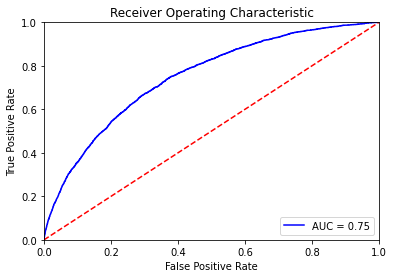

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#gs.fit(X_train, y_train
probs = full_pipeline_RF_fit_AUC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
%%time 
np.random.seed(42)

# Accuracy
# Best params are : {'linear__var_smoothing': 1.0}
# ROCAUC
# Best params are : {'linear__var_smoothing': 1.0}

full_pipeline_NB_fit_AUC = Pipeline([
        ("preparation", num_pipeline),
        ("linear", GaussianNB(
            var_smoothing = 1
        ))
    ])

model_NB_AUC = full_pipeline_NB_fit_AUC.fit(X_train, y_train)

CPU times: user 239 µs, sys: 0 ns, total: 239 µs
Wall time: 248 µs


In [ ]:
%%time 
np.random.seed(42)

# Accuracy
# Best params are : {'linear__learning_rate': 0.1, 'linear__max_depth': 4, 'linear__n_estimators': 180}
# ROCAUC
# Best params are : {'linear__learning_rate': 0.1, 'linear__max_depth': 4, 'linear__n_estimators': 180}

full_pipeline_XGB_fit_AUC = Pipeline([
        ("preparation", num_pipeline),
        ("linear", XGBClassifier(
            random_state=42, booster='gbtree', objective='binary:logistic', eval_metric='auc', use_label_encoder=False, max_depth=4, min_child_weight=1, max_delta_step=0, sampling_method='uniform'
        ))
    ])

model_XGB_AUC = full_pipeline_XGB_fit_AUC.fit(X_train, y_train)

CPU times: user 1min 35s, sys: 751 ms, total: 1min 36s
Wall time: 1min 35s


## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
exp_name = f"Baseline_Imbalanced_data_LR_AUC_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_LR_AUC.predict(X_train)), 
                accuracy_score(y_valid, model_LR_AUC.predict(X_valid)),
                accuracy_score(y_test, model_LR_AUC.predict(X_test)),
                roc_auc_score(y_train, model_LR_AUC.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_LR_AUC.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_LR_AUC.predict_proba(X_test)[:, 1])],4)) 
     
expLog

In [ ]:
exp_name = f"Baseline_Imbalanced_data_RF_AUC_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_RF_AUC.predict(X_train)), 
                accuracy_score(y_valid, model_RF_AUC.predict(X_valid)),
                accuracy_score(y_test, model_RF_AUC.predict(X_test)),
                roc_auc_score(y_train, model_RF_AUC.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_RF_AUC.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_RF_AUC.predict_proba(X_test)[:, 1])],4)) 
     
expLog

In [ ]:
exp_name = f"Baseline_Imbalanced_data_NB_AUC_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_NB_AUC.predict(X_train)), 
                accuracy_score(y_valid, model_NB_AUC.predict(X_valid)),
                accuracy_score(y_test, model_NB_AUC.predict(X_test)),
                roc_auc_score(y_train, model_NB_AUC.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_NB_AUC.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_NB_AUC.predict_proba(X_test)[:, 1])],4)) 
     
expLog

In [ ]:
exp_name = f"Baseline_Imbalanced_data_XGB_AUC_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_XGB_AUC.predict(X_train)), 
                accuracy_score(y_valid, model_XGB_AUC.predict(X_valid)),
                accuracy_score(y_test, model_XGB_AUC.predict(X_test)),
                roc_auc_score(y_train, model_XGB_AUC.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_XGB_AUC.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_XGB_AUC.predict_proba(X_test)[:, 1])],4)) 
     
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_Imbalanced_data_XGB_AUC_50_features,0.7018,0.6985,0.6978,0.7739,0.7536,0.7526


# Baseline Model with Sampled Data

To get a baseline, we will use some of the features after being preprocessed through the pipeline. The baseline model is a logistic regression model. Since 'No default and Default' target records are not balanced in trainging set, we are going to resample the minority class("Default with target value 1") to balance the input dataset

In [42]:
# concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CC_BAL_LIMIT_USE,CC_BAL_CNT_DRAWINGS_ATM_CURRENT,BUREAU_DAYS_CREDIT,CC_BAL_AMT_BALANCE,CC_BAL_AMT_TOTAL_RECEIVABLE,CC_BAL_AMT_RECIVABLE,CC_BAL_AMT_RECEIVABLE_PRINCIPAL,CC_BAL_CNT_DRAWINGS_CURRENT,BUREAU_CREDIT_ACTIVE_Closed,DAYS_BIRTH,PREVAPP_NAME_CONTRACT_STATUS_Refused,BUREAU_CREDIT_ACTIVE_Active,PREVAPP_CODE_REJECT_REASON_XAP,CC_BAL_AMT_INST_MIN_REGULARITY,CREDIT_TO_GOODS_RATIO,BUREAU_DAYS_CREDIT_UPDATE,CC_BAL_DRAWING_LIMIT_RATIO,PREVAPP_NAME_CONTRACT_STATUS_Approved,CC_BAL_MONTHS_BALANCE,REGION_RATING_CLIENT_W_CITY,CC_BAL_AMT_DRAWINGS_ATM_CURRENT,REGION_RATING_CLIENT,CC_BAL_AMT_DRAWINGS_CURRENT,PREVAPP_NAME_PRODUCT_TYPE_walk-in,PREVAPP_CODE_REJECT_REASON_SCOFR,DAYS_LAST_PHONE_CHANGE,PREVAPP_CODE_REJECT_REASON_HC,BUREAU_DAYS_ENDDATE_FACT,CC_BAL_CNT_DRAWINGS_POS_CURRENT,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,CAR_TO_BIRTH_RATIO,PREVAPP_DAYS_FIRST_DRAWING,BUREAU_DAYS_CREDIT_ENDDATE,PREVAPP_DAYS_DECISION,FLAG_EMP_PHONE,DAYS_EMPLOYED,...,PREVAPP_NAME_YIELD_GROUP_high,PREVAPP_PRODUCT_COMBINATION_Cash X-Sell: low,REGION_POPULATION_RELATIVE,PREVAPP_HOUR_APPR_PROCESS_START,PREVAPP_NAME_PAYMENT_TYPE_XNA,PREVAPP_AMT_ANNUITY,PREVAPP_CHANNEL_TYPE_AP+ (Cash loan),BUREAU_CREDIT_TYPE_Credit card,PREVAPP_NAME_PAYMENT_TYPE_Cash through the bank,POS_CAS_MONTHS_BALANCE,PREVAPP_NAME_PORTFOLIO_POS,ELEVATORS_AVG,PHONE_TO_BIRTH_RATIO,PREVAPP_PRODUCT_COMBINATION_POS industry with interest,ELEVATORS_MEDI,FLOORSMIN_AVG,PREVAPP_RATE_DOWN_PAYMENT,FLOORSMIN_MEDI,BUREAU_ENDDATE_DIF,LIVINGAREA_AVG,BUREAU_CREDIT_DURATION,LIVINGAREA_MEDI,FLOORSMIN_MODE,PREVAPP_NAME_CONTRACT_TYPE_Consumer loans,TOTALAREA_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,PREVAPP_NAME_GOODS_CATEGORY_XNA,ELEVATORS_MODE,CREDIT_TO_ANNUITY_RATIO,PREVAPP_NAME_PORTFOLIO_Cards,DEF_60_CNT_SOCIAL_CIRCLE,PREVAPP_DAYS_LAST_DUE_1ST_VERSION,PREVAPP_RATE_INTEREST_PRIVILEGED,LIVINGAREA_MODE,CAR_TO_EMPLOYED_RATIO,AMT_CREDIT,PREVAPP_NAME_GOODS_CATEGORY_Furniture,PREVAPP_PRODUCT_COMBINATION_Cash X-Sell: high,TARGET
21614,0.415347,0.039170,0.506595,NaN,NaN,-736.666667,NaN,NaN,NaN,NaN,NaN,0.333333,-12717,0.000000,0.666667,1.000000,NaN,1.000000,-201.333333,NaN,1.000000,NaN,3,NaN,3,NaN,0.0,0.0,0.0,0.0,-588.000000,NaN,-4533,0,NaN,365243.0,110.333333,-668.000000,1,-877,...,0.000000,0.0,0.002042,18.000000,0.000000,23076.450,0.0,0.333333,1.000000,-19.500000,1.000000,NaN,-0.000000,0.0,NaN,NaN,0.217836,NaN,698.333333,NaN,847.000000,NaN,NaN,1.0,NaN,0,0.0,0.0,NaN,34.085567,0.000000,0.0,-547.0,NaN,NaN,NaN,1305000.0,0.0,0.0,0
209797,NaN,0.198386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12307,0.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,2,NaN,2,NaN,0.0,0.0,-828.0,0.0,NaN,NaN,-3925,1,NaN,365243.0,NaN,-828.000000,1,-1298,...,0.000000,0.0,0.030755,14.000000,0.000000,10796.580,0.0,NaN,1.000000,-21.000000,1.000000,NaN,0.067279,0.0,NaN,NaN,0.198103,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0.0,0.0,NaN,20.785699,0.000000,0.0,-464.0,NaN,NaN,NaN,450000.0,0.0,0.0,0
17976,0.735221,0.589705,NaN,0.259821,0.030303,-2020.714286,26859.835946,26951.31973,26951.31973,25889.061892,0.027027,1.000000,-22406,0.166667,0.000000,0.833333,2262.057097,1.132000,-1787.000000,0.013191,0.833333,-19.0,2,1363.636364,2,1216.216216,0.0,0.0,-1762.0,0.0,-1802.714286,0.0,-4899,0,-0.002856,291994.0,-1644.000000,-1187.000000,0,365243,...,0.333333,0.0,0.019689,12.833333,0.166667,9687.213,0.0,0.142857,0.833333,-37.803922,0.333333,0.0,0.078640,0.0,0.0,0.2083,0.093785,0.2083,158.714286,0.0940,376.714286,0.0957,0.2083,0.5,0.0409,0,0.0,0.5,0.0,10.161580,0.166667,0.0,72299.0,NaN,0.0357,0.000175,127350.0,0.0,0.0,0
282543,0.065550,0.000954,NaN,NaN,NaN,-254.833333,NaN,NaN,NaN,NaN,NaN,0.833333,-8516,0.666667,0.166667,0.333333,NaN,1.422403,-126.833333,NaN,0.333333,NaN,2,NaN,2,NaN,0.0,0.0,0.0,0.0,-153.400000,NaN,-1176,1,-0.001879,365243.0,8637.000000,-697.333333,1,-231,...,0.666667,0.0,0.006207,15.000000,0.000000,5817.840,0.0,0.500000,1.000000,-19.000000,1.000000,NaN,-0.000000,0.0,NaN,NaN,0.072558,NaN,8790.400000,N

In [43]:
from sklearn.utils import resample
# separate minority and majority classes
no_default_data = train_data[train_data.TARGET==0]
default_data = train_data[train_data.TARGET==1]

# sample minority
default_sampled_data = resample(default_data,
                          replace=True, # sample with replacement
                          n_samples=len(no_default_data), # match number in majority class
                          random_state=42) # reproducible 

# combine majority and upsampled minority
train_data = pd.concat([no_default_data, default_sampled_data])

train_data.TARGET.value_counts()

1    204361
0    204361
Name: TARGET, dtype: int64

In [44]:
y_train = train_data['TARGET']
X_train = train_data[top_100_corr_features]

In [43]:
from sklearn.model_selection import ShuffleSplit
cvSplits = ShuffleSplit(n_splits=2, test_size=0.3, random_state=0)

### Log Loss Function for Logistic Regression

<center>
$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

In [ ]:
start = time()
model_LR_AUC_sample = full_pipeline_LR_fit_AUC.fit(X_train, y_train)
np.random.seed(42)

In [ ]:
exp_name = f"Baseline_Balanced_data_LR_AUC_sample_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_LR_AUC_sample.predict(X_train)), 
                accuracy_score(y_valid, model_LR_AUC_sample.predict(X_valid)),
                accuracy_score(y_test, model_LR_AUC_sample.predict(X_test)),
                roc_auc_score(y_train, model_LR_AUC_sample.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_LR_AUC_sample.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_LR_AUC_sample.predict_proba(X_test)[:, 1])],4)) 
     
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_Balanced_data_LR_AUC_sample_50_features,0.6834,0.6935,0.6934,0.7466,0.7452,0.7463


In [47]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = full_pipeline_LR_fit_AUC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

NotFittedError: ignored

### Loss Function

Gini impurity = $\sum_{i=1}^J p_i(1-p_i) $ where $J$ is the number of classes (2 in binary) and $p_i$ is the probability of an individual being of class $i$.

In [ ]:
# start = time()
model_RF_AUC_sample = full_pipeline_RF_fit_AUC.fit(X_train, y_train)
np.random.seed(42)

In [ ]:
exp_name = f"Baseline_Balanced_data_RF_AUC_sample_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_RF_AUC_sample.predict(X_train)), 
                accuracy_score(y_valid, model_RF_AUC_sample.predict(X_valid)),
                accuracy_score(y_test, model_RF_AUC_sample.predict(X_test)),
                roc_auc_score(y_train, model_RF_AUC_sample.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_RF_AUC_sample.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_RF_AUC_sample.predict_proba(X_test)[:, 1])],4)) 
     
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_Balanced_data_LR_AUC_sample_50_features,0.6834,0.6935,0.6934,0.7466,0.7452,0.7463
1,Baseline_Balanced_data_RF_AUC_sample_50_features,0.7360,0.7242,0.7217,0.8159,0.7443,0.7435


In [ ]:
# start = time()
model_NB_AUC_sample = full_pipeline_NB_fit_AUC.fit(X_train, y_train)
np.random.seed(42)

In [ ]:
exp_name = f"Baseline_Balanced_data_NB_AUC_sample_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_NB_AUC_sample.predict(X_train)), 
                accuracy_score(y_valid, model_NB_AUC_sample.predict(X_valid)),
                accuracy_score(y_test, model_NB_AUC_sample.predict(X_test)),
                roc_auc_score(y_train, model_NB_AUC_sample.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_NB_AUC_sample.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_NB_AUC_sample.predict_proba(X_test)[:, 1])],4)) 
     
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_Balanced_data_LR_AUC_sample_50_features,0.6834,0.6935,0.6934,0.7466,0.7452,0.7463
1,Baseline_Balanced_data_RF_AUC_sample_50_features,0.7360,0.7242,0.7217,0.8159,0.7443,0.7435
2,Baseline_Balanced_data_NB_AUC_sample_50_features,0.6232,0.7940,0.7936,0.6968,0.6923,0.7044


### Loss Function
The binary logistic loss function used for this baseline model is as follows:

 

<center>
$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

In [ ]:
# start = time()  
model_XGB_AUC_sample = full_pipeline_XGB_fit_AUC.fit(X_train, y_train)
np.random.seed(42)

In [ ]:
exp_name = f"Baseline_Balanced_data_XGB_AUC_sample_{len(top_100_corr_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_XGB_AUC_sample.predict(X_train)), 
                accuracy_score(y_valid, model_XGB_AUC_sample.predict(X_valid)),
                accuracy_score(y_test, model_XGB_AUC_sample.predict(X_test)),
                roc_auc_score(y_train, model_XGB_AUC_sample.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_XGB_AUC_sample.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_XGB_AUC_sample.predict_proba(X_test)[:, 1])],4)) 
     
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_Balanced_data_LR_AUC_sample_50_features,0.6834,0.6935,0.6934,0.7466,0.7452,0.7463
1,Baseline_Balanced_data_RF_AUC_sample_50_features,0.7360,0.7242,0.7217,0.8159,0.7443,0.7435
2,Baseline_Balanced_data_NB_AUC_sample_50_features,0.6232,0.7940,0.7936,0.6968,0.6923,0.7044
3,Baseline_Balanced_data_XGB_AUC_sample_50_features,0.7093,0.7049,0.7043,0.7839,0.7547,0.7541


## Neural Network Models

In [1]:
import torch

import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
from torch.utils.data import DataLoader

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

import copy
from datetime import datetime
import pickle
import time
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
from torch.optim import lr_scheduler

# Metrics
from sklearn.metrics import auc

In [45]:
full_X_train = num_pipeline.fit_transform(X_train)
full_X_test = num_pipeline.fit_transform(X_test)

full_X_train_gpu = torch.FloatTensor(full_X_train)
full_X_test_gpu = torch.FloatTensor(full_X_test)

y_train_gpu =  torch.FloatTensor(y_train.to_numpy())
y_test_gpu = torch.FloatTensor(y_test.to_numpy())

In [46]:
D_in = full_X_train_gpu.shape[1]
D_out= 1

### TenserBoard Imlementation

In [47]:
# Install latest Tensorflow build
# !pip install tf-nightly
# from tensorflow import summary
# %load_ext tensorboard

In [ ]:
# import datetime
# current_time = str(datetime.datetime.now().timestamp())
# train_log_dir = 'logs/tensorboard/train/' + current_time
# test_log_dir = 'logs/tensorboard/test/' + current_time
# train_summary_writer = summary.create_file_writer(train_log_dir)
# test_summary_writer = summary.create_file_writer(test_log_dir)

### Single Layer Neural Network

In [54]:
model = torch.nn.Sequential(  
    torch.nn.Linear(D_in, D_out),   
    nn.Sigmoid()
)
# loss scaffolding layer
loss_fn = torch.nn.BCEWithLogitsLoss(size_average=True)

learning_rate = 5e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(full_X_train_gpu)
    y_train_gpu = np.reshape(y_train_gpu, (-1,1))
    # Compute and print loss.
    loss = loss_fn(y_pred, y_train_gpu.float())
    if epoch % 50 == 0:
         print(f"Epoch:{epoch}, BCE: {loss.item():.9}")

    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()


Epoch:0, BCE: 0.728608608
Epoch:50, BCE: 0.649878442
Epoch:100, BCE: 0.647231281
Epoch:150, BCE: 0.646752238
Epoch:200, BCE: 0.646537483
Epoch:250, BCE: 0.646410704
Epoch:300, BCE: 0.646327734
Epoch:350, BCE: 0.646269679
Epoch:400, BCE: 0.6462273
Epoch:450, BCE: 0.646195352


In [55]:
def return_report(y, y_prob):
  _, y_pred = torch.max(y_prob, dim = 1)
  y_pred = y_pred.cpu().numpy()
  acc = accuracy_score(y, y_pred)
  roc_auc = roc_auc_score(y, y_prob.cpu().detach().numpy())

  return_list = ([round(acc,4), round(roc_auc, 4)])

  return return_list

In [56]:
def print_report(y, y_prob):
  _, y_pred = torch.max(y_prob, dim = 1)
  y_pred = y_pred.cpu().numpy()
  acc = accuracy_score(y, y_pred)
  roc_auc = roc_auc_score(y, y_prob.cpu().detach().numpy())

  print(f'Accuracy : {round(acc,4)} ; ROC_AUC : {round(roc_auc, 4)}')

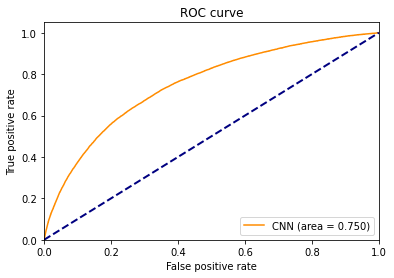

In [57]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate image-level ROC AUC score
y_true = np.reshape(y_train_gpu, (-1,1))
y_pred_tensor = model(full_X_train_gpu)
y_pred = y_pred_tensor.detach().numpy()

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color="darkorange", label="CNN (area = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#For Single Layer
model.eval()
y_test_gpu = y_test_gpu.reshape(-1, 1)
with torch.no_grad():
    y_test_pred_prob=model(full_X_test_gpu)
    print('-' * 50)
    print('Test data : ')
    print_report(y_test, y_test_pred_prob)
    print('-' * 50)

--------------------------------------------------
Test data : 
Accuracy : 0.916 ; ROC_AUC : 0.7461
--------------------------------------------------


In [58]:
X_kaggle_test.replace([np.inf, -np.inf], np.nan, inplace=True)
final_X_kaggle_test = X_kaggle_test
final_X_kaggle_test = num_pipeline.fit_transform(final_X_kaggle_test)
full_X_kaggle_gpu = torch.FloatTensor(final_X_kaggle_test)
full_X_kaggle_gpu.shape

torch.Size([48744, 100])

In [ ]:
  #For Single Layer
  model.eval()
  test_class_scores = model(full_X_kaggle_gpu)
  print(test_class_scores[0:10])

tensor([[1.7375e-01],
        [9.7762e-01],
        [2.3416e-05],
        [1.2708e-05],
        [6.8409e-01],
        [5.6568e-02],
        [1.3432e-04],
        [2.7285e-03],
        [2.5179e-04],
        [9.6608e-01]], grad_fn=<SliceBackward0>)


In [ ]:
# Submission dataframe for Single Layer
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores.detach().cpu().numpy()

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.173750
1,100005,0.977622
2,100013,0.000023
3,100028,0.000013
4,100038,0.684089


### Multi Layer Neural Network Model

#### MLP model with 1 Hidden Layer

In [ ]:
D_hidden = 256 
modelMLP = torch.nn.Sequential(  
    torch.nn.Linear(D_in, D_hidden),   
    nn.ReLU(), 
    nn.Linear(in_features=D_hidden, out_features=D_out) ,  
    nn.Sigmoid()
)
# loss scaffolding layer
loss_fn = torch.nn.BCELoss(size_average=True)

learning_rate = 1e-4
optimizer = torch.optim.Adam(modelMLP.parameters(), lr=learning_rate)

for epoch in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = modelMLP(full_X_train_gpu)
    y_train_gpu = np.reshape(y_train_gpu, (-1,1))
    # Compute and print loss.
    loss = loss_fn(y_pred, y_train_gpu.float())
    if epoch % 50 == 0:
         print(f"Epoch:{epoch}, BCE: {loss.item():.9}")

    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

Epoch:0, BCE: 0.688730657
Epoch:50, BCE: 0.640761018
Epoch:100, BCE: 0.623308241
Epoch:150, BCE: 0.6128003
Epoch:200, BCE: 0.604912758
Epoch:250, BCE: 0.598574758
Epoch:300, BCE: 0.593399227
Epoch:350, BCE: 0.58916533
Epoch:400, BCE: 0.585724115
Epoch:450, BCE: 0.582941532


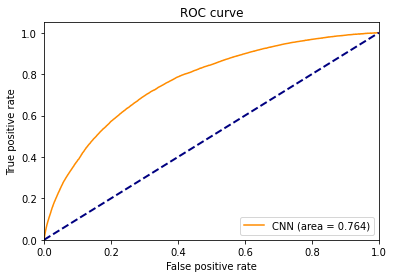

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate image-level ROC AUC score
y_true = np.reshape(y_train_gpu, (-1,1))
y_pred_tensor = modelMLP(full_X_train_gpu)
y_pred = y_pred_tensor.detach().numpy()

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color="darkorange", label="CNN (area = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
modelMLP.eval()
y_test_gpu = y_test_gpu.reshape(-1, 1)
with torch.no_grad():
    y_test_pred_prob=modelMLP(full_X_test_gpu)
    print('-' * 50)
    print('Test data : ')
    print_report(y_test, y_test_pred_prob)
    print('-' * 50)

--------------------------------------------------
Test data : 
Accuracy : 0.916 ; ROC_AUC : 0.7521
--------------------------------------------------


#### MLP model with 2 Hidden layer

In [59]:
D_hidden1 = 128 
D_hidden2 = 64
modelMLP = torch.nn.Sequential(  
    torch.nn.Linear(D_in, D_hidden1),   
    nn.ReLU(), 
    nn.Linear(in_features=D_hidden1, out_features=D_hidden2) , 
    nn.ReLU(), 
    nn.Linear(in_features=D_hidden2, out_features=D_out) ,   
    nn.Sigmoid()
)
# loss scaffolding layer
loss_fn = torch.nn.BCELoss(size_average=True)

learning_rate = 1e-4
optimizer = torch.optim.Adam(modelMLP.parameters(), lr=learning_rate)

for epoch in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = modelMLP(full_X_train_gpu)
    y_train_gpu = np.reshape(y_train_gpu, (-1,1))
    # Compute and print loss.
    loss = loss_fn(y_pred, y_train_gpu.float())
    if epoch % 50 == 0:
         print(f"Epoch:{epoch}, BCE: {loss.item():.9}")

    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()


Epoch:0, BCE: 0.695326626
Epoch:50, BCE: 0.665545344
Epoch:100, BCE: 0.63391012
Epoch:150, BCE: 0.61569339
Epoch:200, BCE: 0.602770329
Epoch:250, BCE: 0.592693269
Epoch:300, BCE: 0.586281657
Epoch:350, BCE: 0.582471311
Epoch:400, BCE: 0.579827487
Epoch:450, BCE: 0.577655494


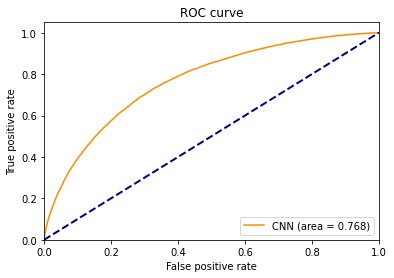

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate image-level ROC AUC score
y_true = np.reshape(y_train_gpu, (-1,1))
y_pred_tensor = modelMLP(full_X_train_gpu)
y_pred = y_pred_tensor.detach().numpy()

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color="darkorange", label="CNN (area = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
modelMLP.eval()
y_test_gpu = y_test_gpu.reshape(-1, 1)
with torch.no_grad():
    y_test_pred_prob=modelMLP(full_X_test_gpu)
    print('-' * 50)
    print('Test data : ')
    print_report(y_test, y_test_pred_prob)
    print('-' * 50)

--------------------------------------------------
Test data : 
Accuracy : 0.916 ; ROC_AUC : 0.7497
--------------------------------------------------


In [61]:
modelMLP.eval()
test_class_scores = modelMLP(full_X_kaggle_gpu)
print(test_class_scores[0:10])

tensor([[0.5152],
        [0.7332],
        [0.1433],
        [0.2978],
        [0.6885],
        [0.5302],
        [0.2319],
        [0.3060],
        [0.1839],
        [0.4844]], grad_fn=<SliceBackward0>)


In [68]:
# Submission dataframe for MultiLayer
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores.detach().cpu().numpy()

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.515156
1,100005,0.733158
2,100013,0.143263
3,100028,0.297806
4,100038,0.688530


## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
#Original
X_kaggle_test.replace([np.inf, -np.inf], np.nan, inplace=True)
test_class_scores = model_XGB_AUC_sample.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

tensor([[0.4769],
        [0.6025],
        [0.2448],
        [0.3244],
        [0.5941],
        [0.3541],
        [0.4375],
        [0.4729],
        [0.4664],
        [0.4004]], grad_fn=<SliceBackward0>)

In [ ]:
# Submission dataframe for original
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

RuntimeError: ignored

In [ ]:
# path=r'\content\gdrive\MyDrive\.kaggle'

In [69]:
submit_df.to_csv("submission1.csv",index=False)

# Kaggle submission via the command line API

In [70]:
! kaggle competitions submit -c home-credit-default-risk -f submission1.csv -m "MultiLayer NN (1st layer=128, 2nd layer = 64) submission"

100% 835k/835k [00:01<00:00, 480kB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
The aim of this project is to use machine learning methodologies on historical loan application data to predict whether or not an applicant will be able to repay a loan.
As an extension to the Visual EDA driven feature sampling and baseline model development, the focus for this phase included data modelling to combine available datasets, feature engineering considering categorical and numerical features and implementing experiments using Logistic Regression, Random Forest, Baiyes Naive, XGBoost and **Neural Networks**. Our results in this phase show that the best performing neural network was multi layer model with just a single layer in between the input and output layers with **Relu** as the activation function and **256** hidden neurons. The neural network gave a Kaggle AUC score of 74.68%. Overall, XGBoost was the best performing model with validation accuracy 70.49% and 75.41% as the test ROC_AUC,respectively for a balanced dataset. The lowest performing was LR model at 69.31% and 74.64% validation and test AUC(Area under ROC). Our best score in Kaggle submission out of all four submission was 0.74464.


## Introduction
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The results of the machine learning pipelines are measured by using these metrics: Accuracy Score, Precision, Recall, Confusion Matrix and Area Under ROC Curve (AUC).

The results of our pipelines will be analyzed and ranked. The most efficient pipeline will be submitted to the Kaggle competition for the Home Credit Default Risk (HCDR).

## EDA

Exploratory Data Analysis is valuable to this project since it allows us to get closer to the certainty that the future results will be valid, accurately interpreted, and applicable to the proposed solution.

In phase 1 for this project this step involves looking at the summary statistics for each individual table in the model and focusing on the missing data , distribution and its central tendencies such as mean, median, count, min, max and the interquartile ranges. We also checked the correlation of each variable with Target variable and amongst other variables.

We performed exploratory data analysis on categorical and numerical features and also plotted the pair-wise plots with respect to the Target variable 

## Feature Engineering and transformers
In our feature engineering process, we created a few features within the secondary tables bureau and credit card balance tables by performing certain numerical operations. After that, we aggregated the numerical columns by taking the mean of all the columns by grouping on the SK_ID_CURR column which was then merged with the main applications_train table.

We engineered features which calculated the max, min and mean of all numerical columns in both the primary and secondary tables. Apart from that, we also created new features by doing numerical calculations on the columns of the secondary tables such as the bureau table, cc balance table, installments tables, etc. Some examples of new features are:

- **BUREAU_CREDIT_TO_ANNUITY_RATIO (Bureau Table)** - Based on the ratio of bureau amount credit sum and bureau amount annuity 
- **PREVAPP_APPLICATION_CREDIT_DIFF (PrevApps Table)** - Based on the ratio prevapp amt application and prevapp amount credit 
- **CC_BAL_LIMIT_USE (CC_bal Table)** - Based on the ratio of cc balance amount balance and cc balance amount credit limit actual

The way we went about doing this was first by doing OHE to convert categorical columns to numeric columns. After that we grouped the columns on SK_ID by taking the mean of the grouping. Next, we added the mean, max and min columns to all the secondary tables followed by adding new features to the tables.

After the aggregation was performed followed by every individual merging of the secondary tables with the primary table, we generated the correlation of all the features with respect to the ‘TARGET’ variable and based on the absolute correlation values, we selected the top 30 features which were the final numerical features for the base pipeline. These were then merged with the categorical features and in total our baseline model consisted of 37 features ( 30 numerical and 7 categorical)
## Pipelines

### Phase - 1
Logistic regression model was used as a baseline Model. Training a logistic regression model doesn't require high computation power.
Numerical pipeline was used which included the steps of Feature Selection, Imputation and Standardization. Categorical pipeline was used which included Standardization and one-hot encoding.
Implementing Logistic Regression as a baseline model is a good starting point for classification tasks due to its easy implementation and low computational requirements. We prepared our data pipeline of Logistic Regression with default parameters (penalty = 'l2', C = 1.0, solver = 'lbfgs', tol = 1e-4).

Here is the high-level workflow for the model pipeline followed by detailed steps:

1. Downloaded data and performed data pre-processing tasks (joining primary and secondary datasets, transformation)
2. Created a data pipeline with highly correlated numerical and categorical features.
3. Imputed missing numerical attribute with mean values and categorical values with the ‘missing’ word
4. Applied FeatureUnion to combine both Numerical and Categorical features.
5. Created model with data pipeline and baseline model to fit training dataset
6. Evaluated the model using accuracy score, AUC score, RMSE and MAE for train, validation and test datasets. Recorded the results in a dataframe. 

### Phase - 2

In the second phase, apart from logistic regression we experimented by training different models and checking out the test AUC. After the extensive feature engineering process, we decided to do hyperparameter tuning for different models that we were trying to test. We chose 6 models Logistic Regression, Naive Bayes, Random Forest, XGBoost, KNN and SVM. Of these, it was taking too long to do the hyperparameter tuning of KNN and SVM and so we decided to drop the testing of these models. We then proceeded with the remaining 4 models i.e Logistic Regresison, Naive Bayes, Random Forest and XGBoost. Apart from that, since the dataset was imbalanced, we also sampled the data to get accurate results. Once we got the best parameters for all the 4 models based on the previous steps, we trained the models on those paraemeters to finally get the test results for the all the models. We found that XGBoost was showing the best performance from among all the models.


<img src="Pipeline.png">


###Phase - 3

In the third phase, we implemented the following combinations of neural networks in our quest to better our AUC score:

1. Single Layer Neural Network
2. Multilayer Neural Network
 - Single Hidden Layer
 - Double Hidden Layers

Within these neural netowrks, we also did hyperparamter tuning for the number of neurons as well as the learning rate. **Binary cross entropy loss(CXE)** was used as the evaluation metric for the hyperparameter tuning of the neural networks. We submitted our test values on Kaggle and noted down the Kaggle AUC scores as well. Based on that, we found that a multilayer neural network with a single hidden layer, 256 hidden neurons and a learning rate of 1e-4 was the best perforoming neural network which gave the Kaggle AUC score of 74.68%. However, we found that the XGBoost model that we developed in phase 2 was still the best performing model for this project.

##Binary cross-entropy loss (CXE)
CXE measures the performance of a classification model whose output is a probability value between 0 and 1. CXE increases as the predicted probability diverges from the actual label. Therefore, we choose a parameter, which would minimize the binary CXE loss function.

The log loss formula for the binary case is as follows:

$$ \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ \sum_{i=1}^m -y_iX_i\theta + \log(1+e^{X_i\theta}) \right]
 $$


##Data Leakage

In Phase 3, we had a better understanding of the data and were able to tweak our feature engineering to minimize the data leakage. We noticed that the SK_ID column from the credit card balance table was part of the features that were being pushed into the machine learning model. Logically, this column doesn't add any value to the model and it could be considered as a data leakage. We then ensured that the feature was removed after we gathered the top 100 features and then passed those features excluding the SK_ID feature into the machine learning model.


## Discussion & Experimental results

Below is the results of the 4 models for imbalanced dataset:

<img src = "Imbalanced_Results.png">

And the results for the balanced dataset:

<img src = "Balanced_Results.png">

We can clearly see that XGBoost is the best performing model among all the 4 models with validation accuracy of 70.49% and 75.41% as the test ROC_AUC for balanced dataset.

## Discussion of Results:

Based on the models discussed above, XGBoost stood out as the best predictive model using the top 50 features. Please **note** that we are noting the **training accuracy** based on the results we obtained on the **balanced dataset**:

**Logistic Regression:** This model was chosen as the baseline model trained. The training accuracy for this model was 68.34% and test accuracy was 69.33%. A 74.64% AUC score resulted with best parameters for this model. We used the log loss function for this model.

**Naive Bayes:** Training accuracy of 62.32% and test accuracy of 79.36% was achieved in this model. Test AUC under the curve for this model came out to 70.44%. 

**Random Forest:** The accuracy of the training and test are 73.60% and test 72.17%. Test ROC under the curve is 74.35%. We used the Gini impurity loss function forn this model. 

**XGBoost:** By far this model resulted in the best model. The accuracy of the training and test are 70.93% and test 70.43%. Test ROC under the curve is 75.41% which was the highest. We used the binary logistic loss function for this model.

**Neural Networks:** We got Kaggle AUC score of **74.68%** for a multilayer neural network with a single hidden layer, 256 neurons and learning rate of 1e-4. It was our second best model for this dataset.

## Deep Learning

**Single Layer Neural Network**

<img src = "No_Layer_Accuracy.png">

**Multi Layer Neural Network**

<img src = "Single_Layer_Accuracy.png">

<img src = "Single_Layer_ROC_Curve.png">


## Conclusion

Our implementation using ML models to predict if an applicant will be able to repay a loan was successful. Extending from the phase-1's simple baseline model, data modelling with feature aggregation, feature engineering, and using various data preprocessing pipeline both increased & reduced efficiency of models. Models used for prediction were Logistic Regression, Random Forest, Naive Bayes, XGBoost and Neural Networks.

Single and Multi-layer deep learning models, including linear, sigmoid, ReLu, and hidden layers were added with binary CXE loss function. The deep learning Kaggle score fell short of the XGBoost model; additional experimentation will result in a better performing deep learning models. By combining and continuing to refine our extended loss function, we can further demonstrate our effectiveness.

Our best performing algorithm was XGBoost with the best AUC ROC score as 75.41%. The lowest performing model was Naive Bayes. Our best score in Kaggle submission out of all four submission was 0.74464.


## Kaggle Submission
Below is the screenshot of our Kaggle submission

<img src = "Kaggle_Submission_Final.png">

# References



- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook
- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
- https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
- https://juhiramzai.medium.com/introduction-to-credit-risk-modeling-e589d6914f57